# Исследование рынка заведений общественного питания Москвы

**Цель проекта**

На основании открытых данных, необходимо проанализировать ситуацию на рынке общественного питания г. Москвы. Исследование поможет определиться с видом будущего заведения, количеством посадочных мест и районом расположения.   

Так же, основные тезисы исследования необходимо оформить в виде презентации для демонстрации группе инвесторов.


**Входные данные**


*    данные о заведениях общественного питания Москвы (файл `rest_data.csv`)

`id` — идентификатор объекта;    
`object_name` — название объекта общественного питания;    
`chain` — сетевой ресторан;    
`object_type` — тип объекта общественного питания;    
`address` — адрес;    
`number` — количество посадочных мест.
 
 
**Ход исследования**

Исследование пройдёт в четыре этапа:

*    Обзор  и предобработка данных;
*    Анализ данных;
*    Выводы и рекомендации;
*    Презентация.


## Обзор и предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings; warnings.filterwarnings(action='ignore')
from plotly import graph_objects as go
from IPython.display import set_matplotlib_formats

In [2]:
# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

# игнорируем предупреждения
pd.set_option('chained_assignment', None)

# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

# устанавливаем стиль графиков
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":200, 'savefig.dpi':300})
sns.set_context('notebook')  
sns.set_style("ticks")

In [3]:
# чтение файлов с данными и сохранение в df
data = pd.read_csv('rest_data.csv')

In [4]:
# обзор данных
data.info()
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
12839,204001,Кафе,нет,кафе,"город Москва, Тихорецкий бульвар, владение 1, строение 1",25
13258,196568,СушиStore,нет,магазин (отдел кулинарии),"город Москва, поселение Московский, Киевское шоссе, 23-й километр, домовладение 8, строение 1",0
3048,155144,Бургер Кинг Burger King,да,предприятие быстрого обслуживания,"город Москва, Климентовский переулок, дом 14",150
9264,166586,Буфет,нет,буфет,"город Москва, Верхняя Первомайская улица, дом 43",17
11576,177270,Babbles dessert&babbles,нет,кафе,"город Москва, Кировоградская улица, дом 13А",8
3987,28821,столовая при школе № 672,нет,столовая,"город Москва, Зелёный проспект, дом 14",240
4233,29214,СТОЛОВАЯ при ГБОУ Школа № 1503,нет,столовая,"город Москва, улица Павла Корчагина, дом 18",100
9158,160129,Кафе при гостинице «Вояджер»,нет,кафе,"город Москва, Дербеневская набережная, дом 7, строение 21",8
3998,23224,Перовский дворик,нет,ресторан,"город Москва, улица Лазо, дом 7",50
1465,129818,Домино'с Пицца,да,кафе,"город Москва, Жулебинский бульвар, дом 9",46


In [5]:
# обзор данных
display(data['number'].describe())
display(data['chain'].unique())
data['object_type'].unique()

count   15,366.00
mean        59.55
std         74.74
min          0.00
25%         12.00
50%         40.00
75%         80.00
max      1,700.00
Name: number, dtype: float64

array(['нет', 'да'], dtype=object)

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [6]:
data.query('number == 0').sample(5)

,id,object_name,chain,object_type,address,number
10122,172504,Суши WOK,да,кафе,"город Москва, Семёновская площадь, дом 7, корпус 17А",0
5652,154823,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, Первомайская улица, владение 104А",0
14208,216651,Пекарня,нет,кафетерий,"город Москва, Сокольническая площадь, дом 9А",0
12344,204712,Кофе,нет,предприятие быстрого обслуживания,"город Москва, улица Нижняя Масловка, дом 5",0
9542,164788,Пиццерия,нет,предприятие быстрого обслуживания,"город Москва, Домодедовская улица, дом 28",0


In [7]:
data.query('number > 1000').sample(5)

,id,object_name,chain,object_type,address,number
2313,26560,Ресторан «АЛЬФА»,нет,ресторан,"город Москва, Измайловское шоссе, дом 71, корпус А",1040
8148,80291,Банкетный зал Шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом 12, строение 10Г",1500
3686,27026,РУМ СЕРВИС,нет,ресторан,"город Москва, площадь Европы, дом 2",1200
9064,19719,КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,нет,столовая,"город Москва, проспект Вернадского, дом 84, строение 1",1288
4480,27024,РУМ СЕРВИС,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, строение 1",1200


**Выводы**

Таблица содержит информацию о 15366-ти разнообразных точках питания в Москве.   

Есть заведения, не имеющие посадочных мест вовсе (например, отделы кулинарии или предприятия быстрого обслуживания), а есть настоящие рекордсмены в виде залов, расчитанные на банкеты (более 1000-и посадочных мест).   

На первый взгляд, данные не содержат пропусков, но кое-что требует правки: замена типа данных в столбце `chain` на булев (т.к. мы имеем бинарные значения в данном столбце). Так же нужно проверить данные на наличие дубликатов и вынести название улицы в отдельную колонку для дальнейшего изучения локаций.    

Приступаем к предобработке данных.

### Предобработка данных

In [8]:
# проверка на явные дубликаты
data.duplicated().sum()

0

In [9]:
# боремся с неявными дубликатами заведений - приводим значения к верхнему регистру, убираем крайние пробелы
data['object_name'] = data['object_name'].str.upper()
data['object_name'] = data['object_name'].str.strip()

In [10]:
data.groupby('object_name').agg({'id': 'nunique'}).sort_values(by='id', ascending=False).head(50)

,id
object_name,
СТОЛОВАЯ,321
КАФЕ,278
ШАУРМА,250
ШОКОЛАДНИЦА,158
KFC,155
МАКДОНАЛДС,151
БУРГЕР КИНГ,137
ТЕРЕМОК,94
КРОШКА КАРТОШКА,90


Видим неявные дубликаты (ШОКОЛАДНИЦА - КАФЕ "ШОКОЛАДНИЦА", STRBUCKS - СТАРБАКС, SUBWAY - САБВЭЙ), от которых и избавимся.   

Так же, выведем улицу в отдельную колонку. К сожалению, понимаем, что часть названий улиц будет обработано некорректно из-за различий в написании адреса.

In [11]:
# избавляемся от неявных дубликатов
data['object_name'] = data['object_name'].replace(
    ['КАФЕ "ШОКОЛАДНИЦА"','СТАРБАКС', 'САБВЭЙ'], 
    ['ШОКОЛАДНИЦА', 'STARBUCKS', 'SUBWAY'])

In [12]:
# добавляем название улицы в отдельное поле
streets = data['address'].to_list()

streets_list = []

for street in streets:  
    start = street.find('город Москва, ')
    end = street.find(', дом')
    streets_list.append(street[start+14:end])

In [13]:
data['street'] = streets_list
data.head(5)

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,РОДНИК,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,КАФЕ «АКАДЕМИЯ»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,КАФЕ «ВИШНЕВАЯ МЕТЕЛЬ»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [14]:
data['chain'] = data['chain'] == 'да'

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  bool  
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
 6   street       15366 non-null  object
dtypes: bool(1), int64(2), object(4)
memory usage: 735.4+ KB


## Анализ данных

### Соотношение видов объектов общественного питания

Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

In [16]:
data_by_type = (
    data
    .groupby('object_type')
    .agg(count=('id','count'))
    .reset_index()
    .sort_values('count', ascending=False)
)

data_by_type['percent'] = data_by_type['count'] / sum(data_by_type['count']) * 100

data_by_type

,object_type,count,percent
3,кафе,6099,39.69
8,столовая,2587,16.84
7,ресторан,2285,14.87
6,предприятие быстрого обслуживания,1923,12.51
0,бар,856,5.57
1,буфет,585,3.81
4,кафетерий,398,2.59
2,закусочная,360,2.34
5,магазин (отдел кулинарии),273,1.78


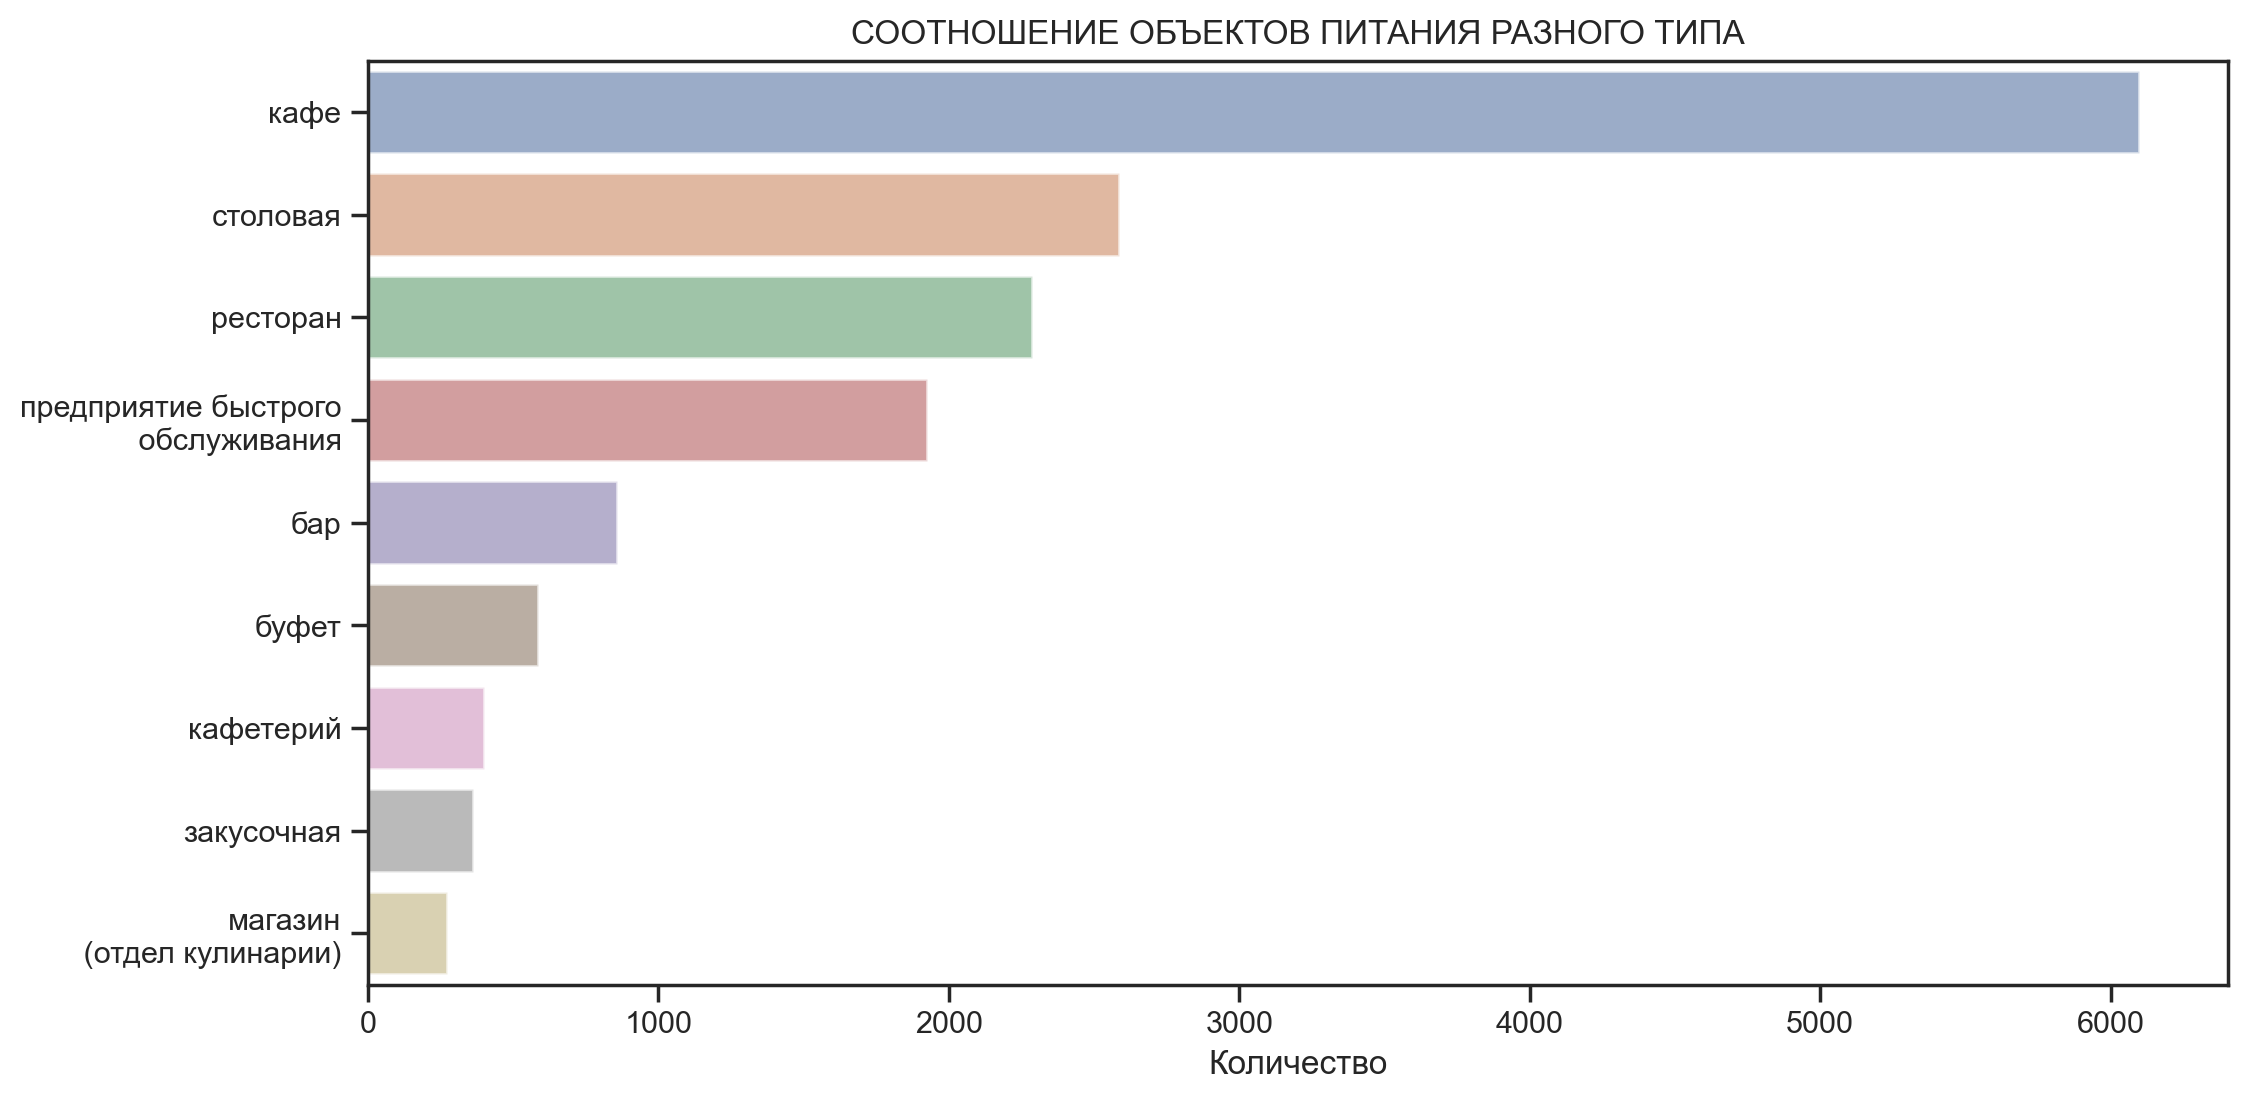

In [17]:
# оформляем переносы для подписей
data_by_type['object_type'] = data_by_type['object_type'].replace(
    ['предприятие быстрого обслуживания', 'магазин (отдел кулинарии)'], 
    ['предприятие быстрого\n обслуживания', 'магазин\n (отдел кулинарии)'])

# строим график

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='count', y='object_type', 
                 data=data_by_type, 
                 orient='h', alpha=0.6)
ax.set_title('СООТНОШЕНИЕ ОБЪЕКТОВ ПИТАНИЯ РАЗНОГО ТИПА')
ax.set_xlabel('Количество') 
ax.set_ylabel('')
plt.show()

Как мы видим, подавляющее количество заведений  - кафе (почти 40% или 6099 штук).    
Далее идут столовые и рестораны (17% и 15% соответсвенно). Меньше всего город представлен закусочными и магазинами с отделами кулинарии (по ~2%).

### Особенности сетевых и несетевых заведений

Исследуем соотношение сетевых и несетевых заведений.

,chain,count
0,False,12398
1,True,2968


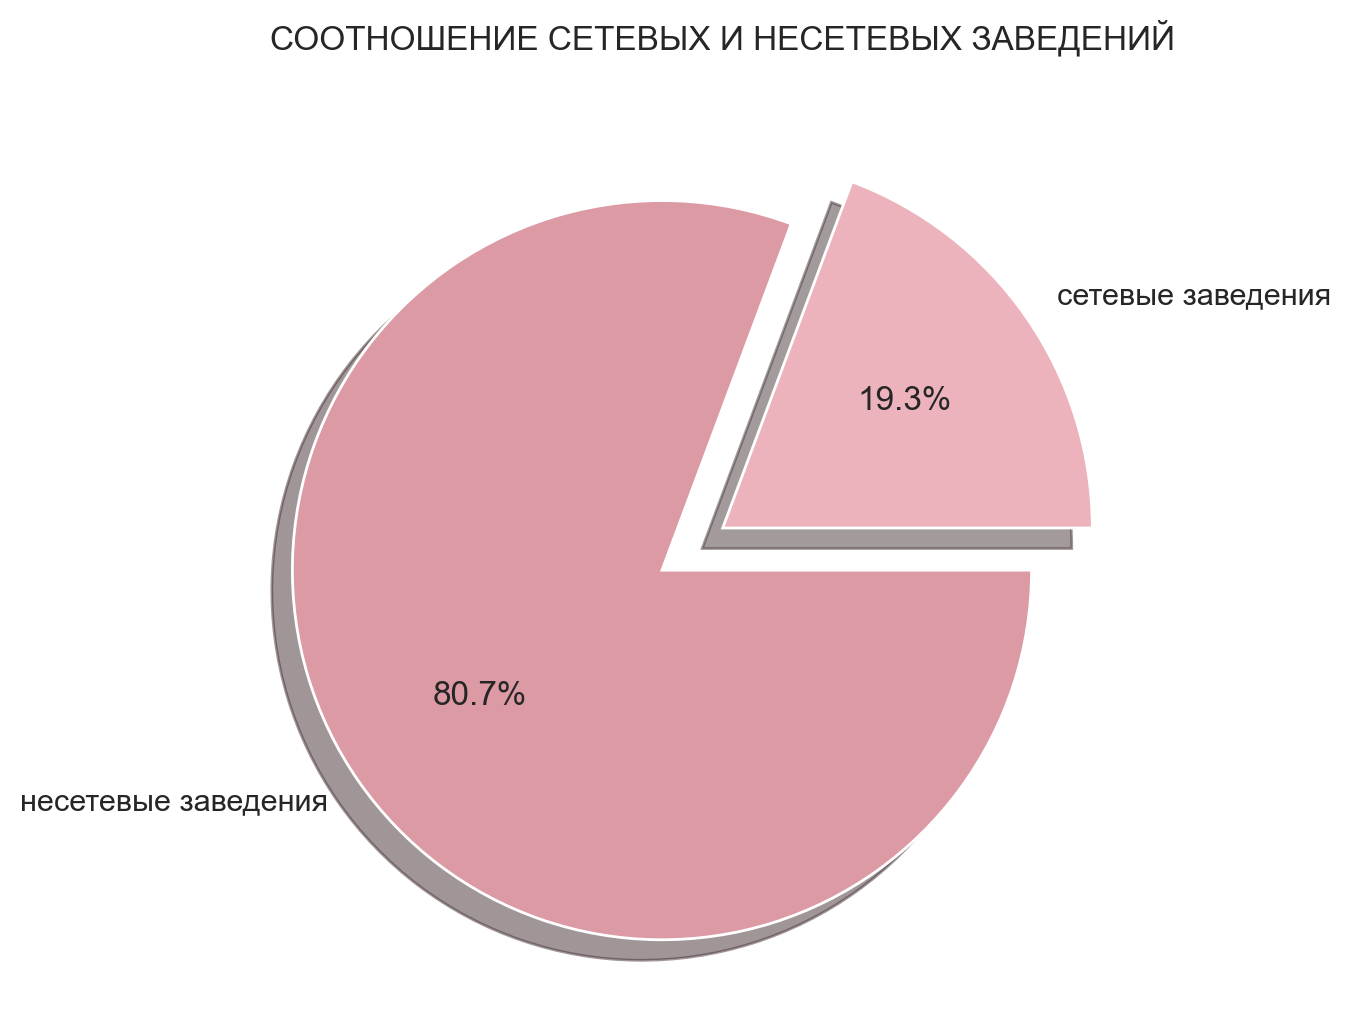

In [18]:
data_by_chain = data.groupby('chain').agg(count=('id','count')).reset_index()
display(data_by_chain)

plt.figure(figsize=(6, 6))
colors = ['#DC9AA5', '#EDB3BD']
labels = ['US', 'UK', 'India', 'Germany', 'Australia', 'South Korea']
explode = (0.2, 0)
plt.pie(data_by_chain['count'],
        labels=data_by_chain['chain'].map({True: 'сетевые заведения', False: 'несетевые заведения'}), 
        colors=colors,
        explode=explode, 
        autopct='%1.1f%%',
        counterclock=False, 
        shadow=True)
plt.title('СООТНОШЕНИЕ СЕТЕВЫХ И НЕСЕТЕВЫХ ЗАВЕДЕНИЙ')
plt.show()

Более 80% объектов общественного питания - несетевые.  Посмотрим на соотношение "сетевые/несетевые" в разрезе типов заведений.  

,object_type,chain_count,total_count,%%
6,предприятие быстрого обслуживания,791,1923,41.13
5,магазин (отдел кулинарии),78,273,28.57
7,ресторан,544,2285,23.81
3,кафе,1396,6099,22.89
2,закусочная,56,360,15.56
4,кафетерий,52,398,13.07
0,бар,37,856,4.32
1,буфет,11,585,1.88
8,столовая,3,2587,0.12


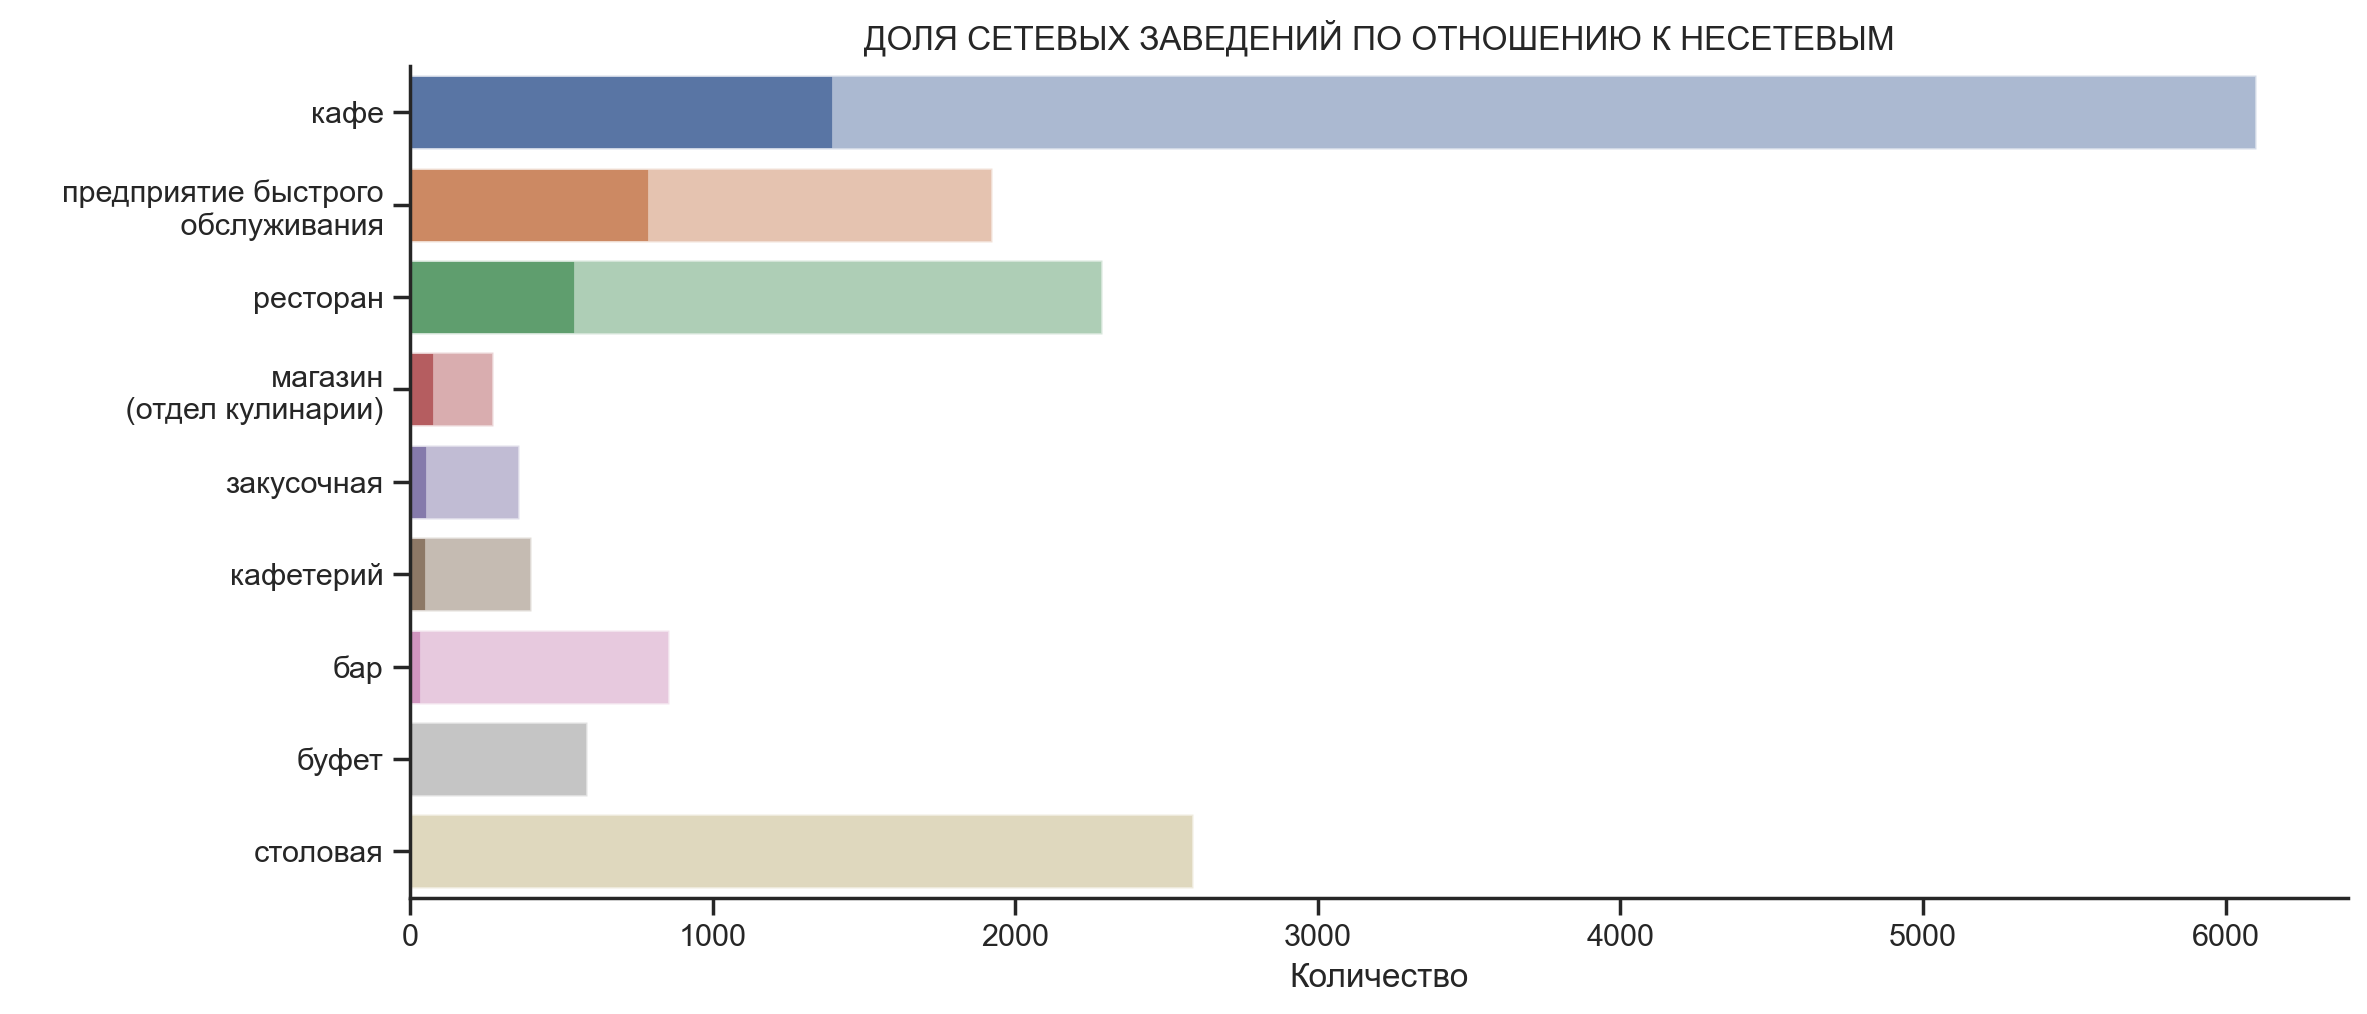

In [19]:
data_chain_type = data.groupby('object_type').agg({'chain' : 'sum',
                                'id' : 'count'}).reset_index()
data_chain_type.columns = ['object_type', 'chain_count', 'total_count']
data_chain_type['%%'] = data_chain_type['chain_count'] / data_chain_type['total_count'] * 100
data_chain_type = data_chain_type.sort_values('chain_count', ascending=False)
display(data_chain_type.sort_values(by='%%', ascending=False))

data_chain_type['object_type'] = data_chain_type['object_type'].replace(
    ['предприятие быстрого обслуживания', 'магазин (отдел кулинарии)'], 
    ['предприятие быстрого\n обслуживания', 'магазин\n (отдел кулинарии)'])

ax = sns.catplot(data=data_chain_type, 
                 kind="bar", 
                 x="chain_count", 
                 y="object_type",               
                 alpha=1, 
                 aspect=12/5)
ax1 = sns.barplot(x='total_count', y='object_type', data=data_chain_type, alpha=0.5,  orient='h')
ax.set_axis_labels('Количество', ' ')
plt.title('ДОЛЯ СЕТЕВЫХ ЗАВЕДЕНИЙ ПО ОТНОШЕНИЮ К НЕСЕТЕВЫМ')
plt.show()

Самая большая доля сетевых объектов приходится на предприятия быстрого обслуживания - 41% от общего числа заведений этого типа; а вот для буфетов и столовых такое совсем не типично.По абсолютному количеству среди сетей лидируют кафе (1396 точек).    

### Распределение посадочных мест

Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или много заведений с большим количеством посадочных мест? Давайте посмотрим на данные по общему количеству сетевых точек и среднему количеству посадочных мест в них (в разрезе типов).

In [20]:
data_chain_number = data.query('chain == True').groupby('object_type').agg({'number' : 'mean',
                                'id' : 'count'}).reset_index()
data_chain_number.columns = ['object_type', 'number_count_mean', 'total_count']
data_chain_number['number_count_mean'] = data_chain_number['number_count_mean'].round()

data_chain_number.sort_values(by='total_count', ascending=False)

,object_type,number_count_mean,total_count
3,кафе,47.00,1396
6,предприятие быстрого обслуживания,40.00,791
7,ресторан,100.00,544
5,магазин (отдел кулинарии),9.00,78
2,закусочная,14.00,56
4,кафетерий,12.00,52
0,бар,53.00,37
1,буфет,13.00,11
8,столовая,112.00,3


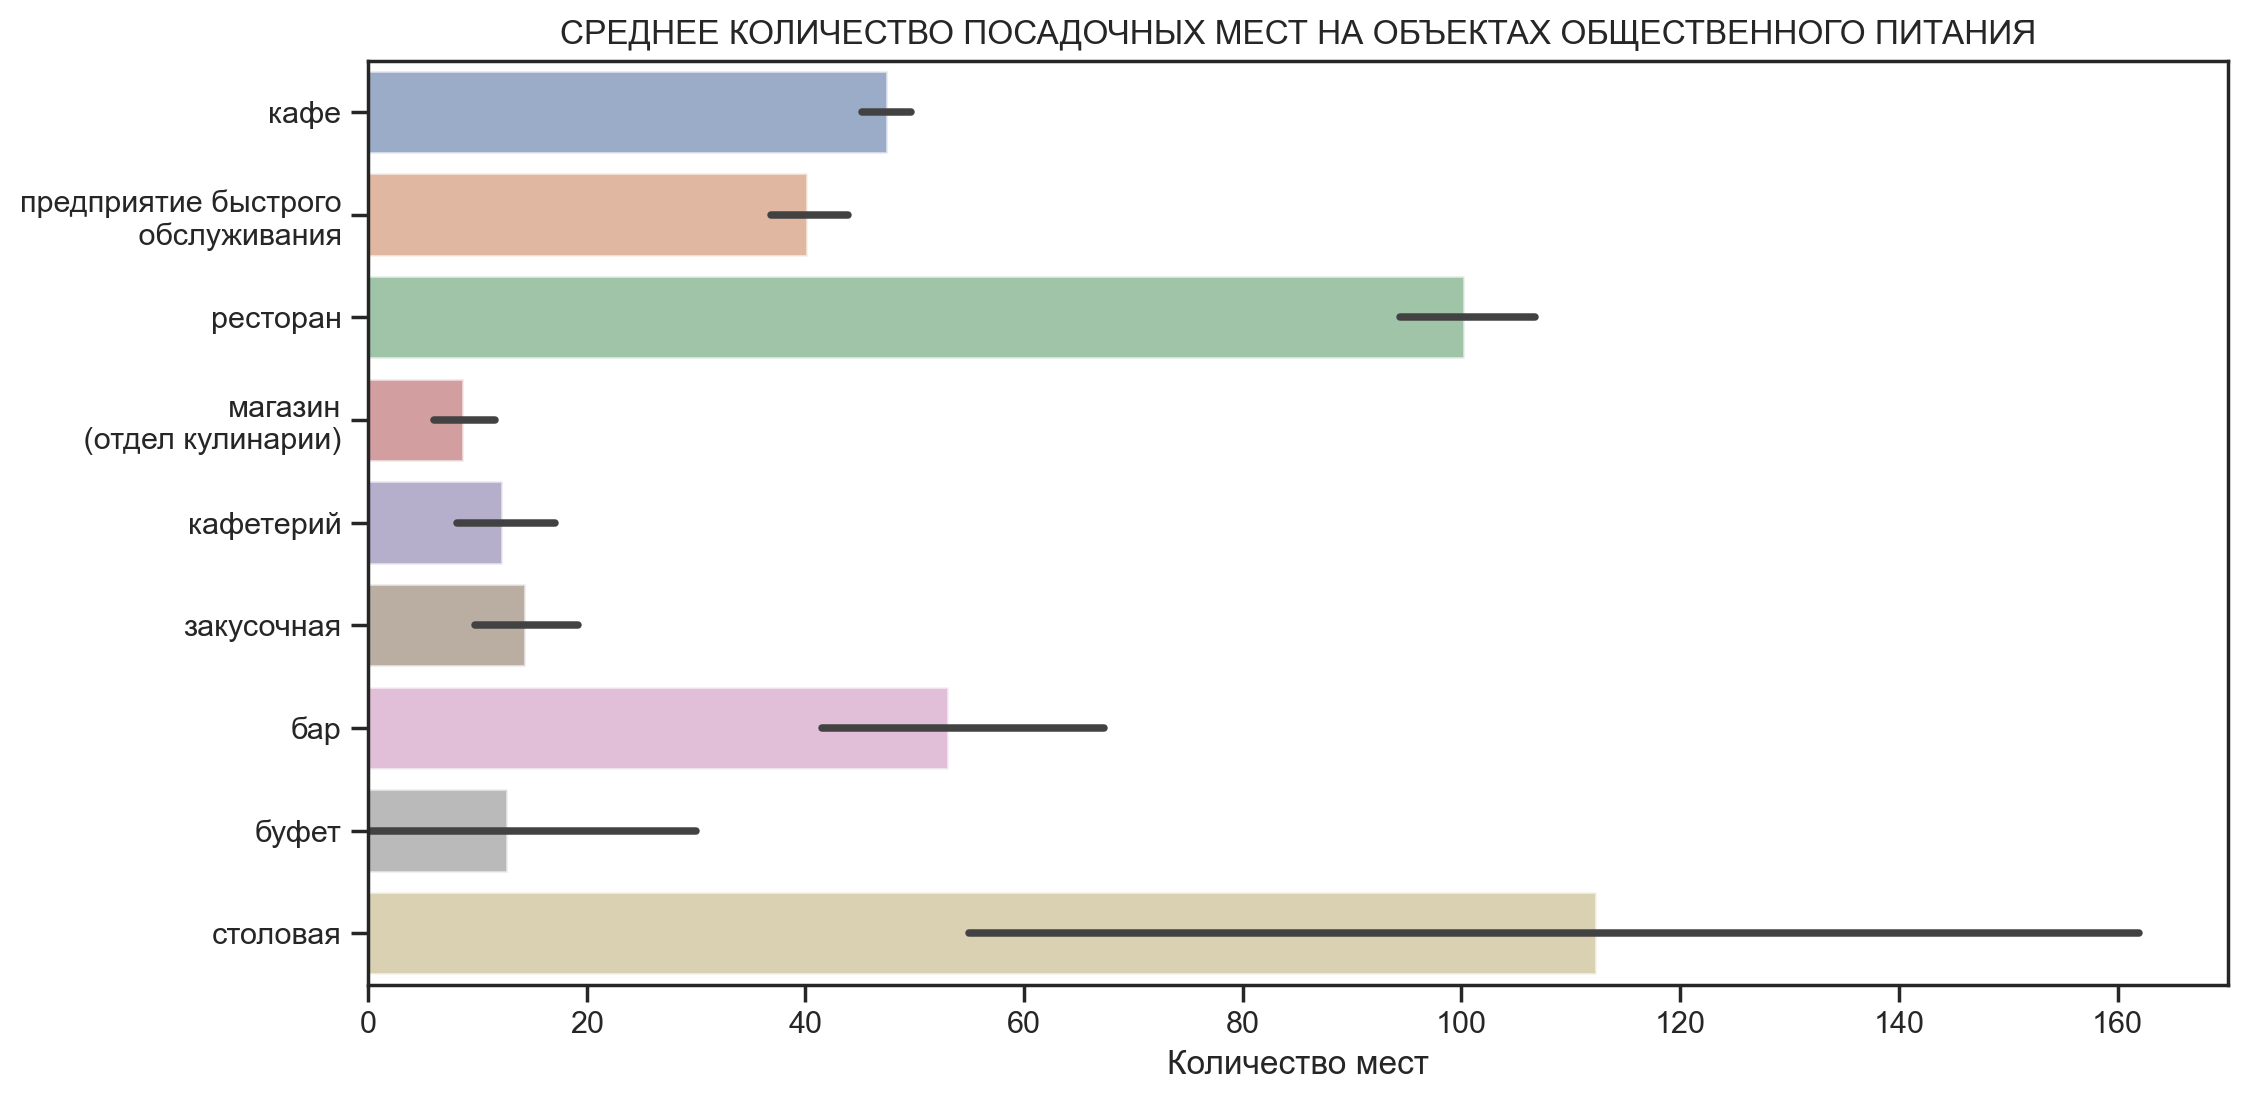

In [21]:
data['object_type'] = data['object_type'].replace(
    ['предприятие быстрого обслуживания', 'магазин (отдел кулинарии)'], 
    ['предприятие быстрого\n обслуживания', 'магазин\n (отдел кулинарии)'])

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='number', y='object_type', data=data.query('chain==True'), orient='h', alpha=0.6)
ax.set_title('СРЕДНЕЕ КОЛИЧЕСТВО ПОСАДОЧНЫХ МЕСТ НА ОБЪЕКТАХ ОБЩЕСТВЕННОГО ПИТАНИЯ')
ax.set_xlabel('Количество мест') 
ax.set_ylabel('')
plt.show()

Как мы видим, самое большое количество посадочных мест - у сетевых ресторанов и столовых.

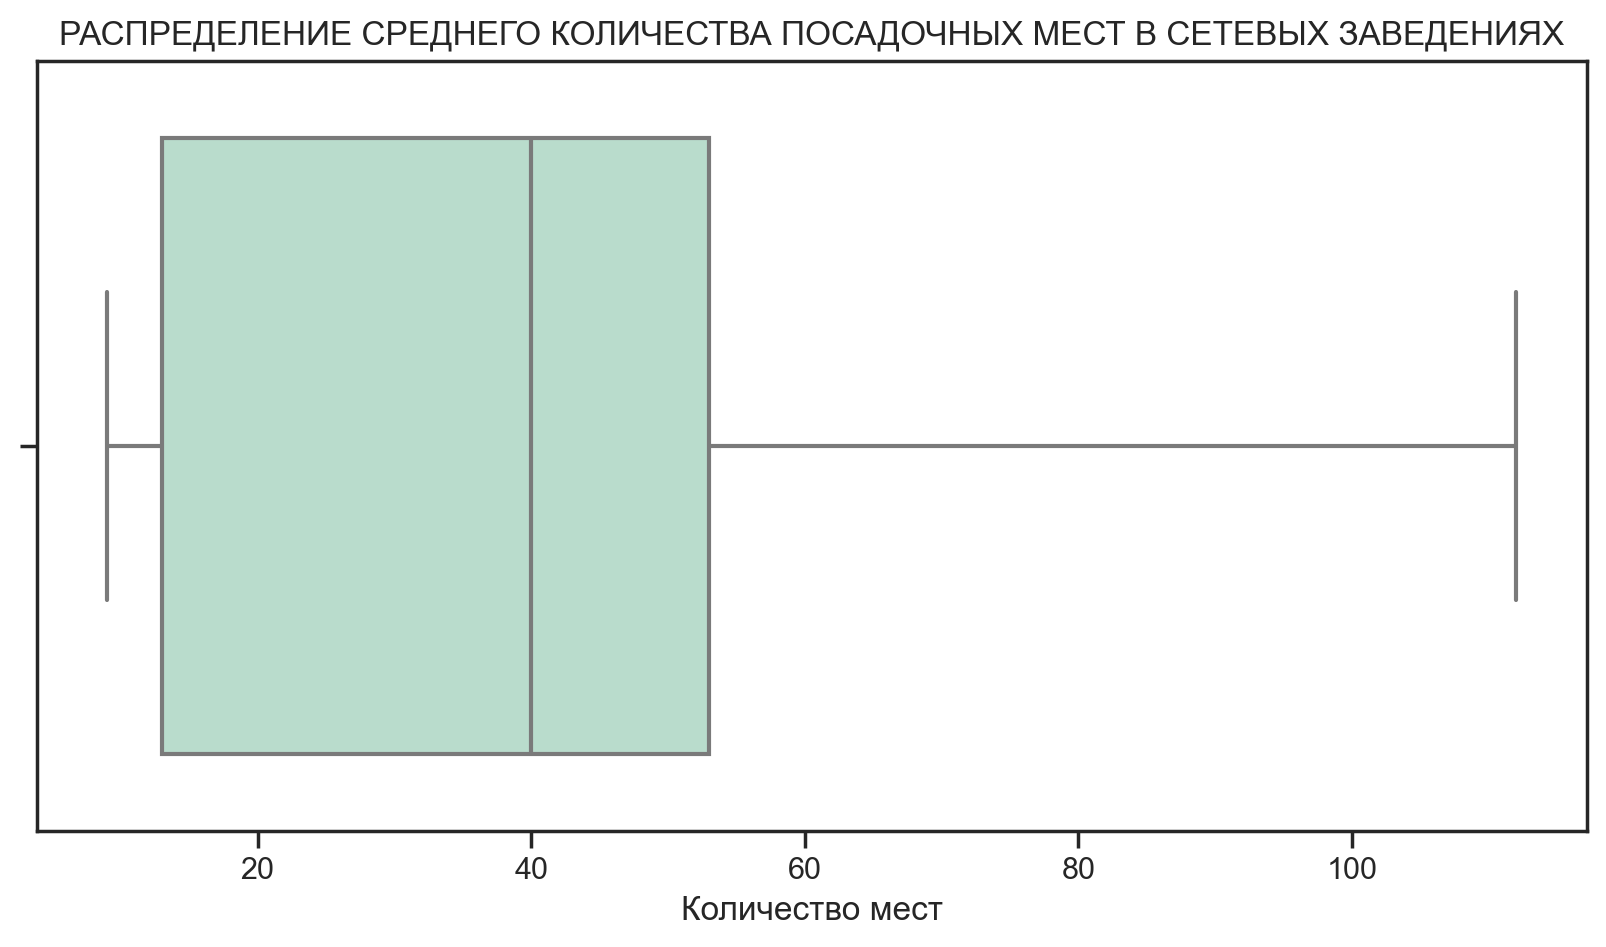

In [22]:
plt.figure(figsize=(10, 5))
plt.title('РАСПРЕДЕЛЕНИЕ СРЕДНЕГО КОЛИЧЕСТВА ПОСАДОЧНЫХ МЕСТ В СЕТЕВЫХ ЗАВЕДЕНИЯХ')
sns.boxplot(x="number_count_mean", data=data_chain_number, palette='Pastel2')
plt.xlabel('Количество мест')
plt.show()

А в среднем, количество посадочных мест, варьируются от 10 до 55.     

Согласно ГОСТР 50762-95 «Общественное питание. Классификация предприятий» в зависимости от количества посадочных мест предприятия питания подразделяются на: крупные (свыше 120 мест), средней мощности (от 40 до 120 мест) и малые (до 40 мест).    

Таким образом, мы можем сказать, что сетевые заведения относятся преимущественно к предприятиям средней мощности.

Посмотрим на распределение количества посадочных мест в разрезе типов заведений по всей базе, а не только в сетях.

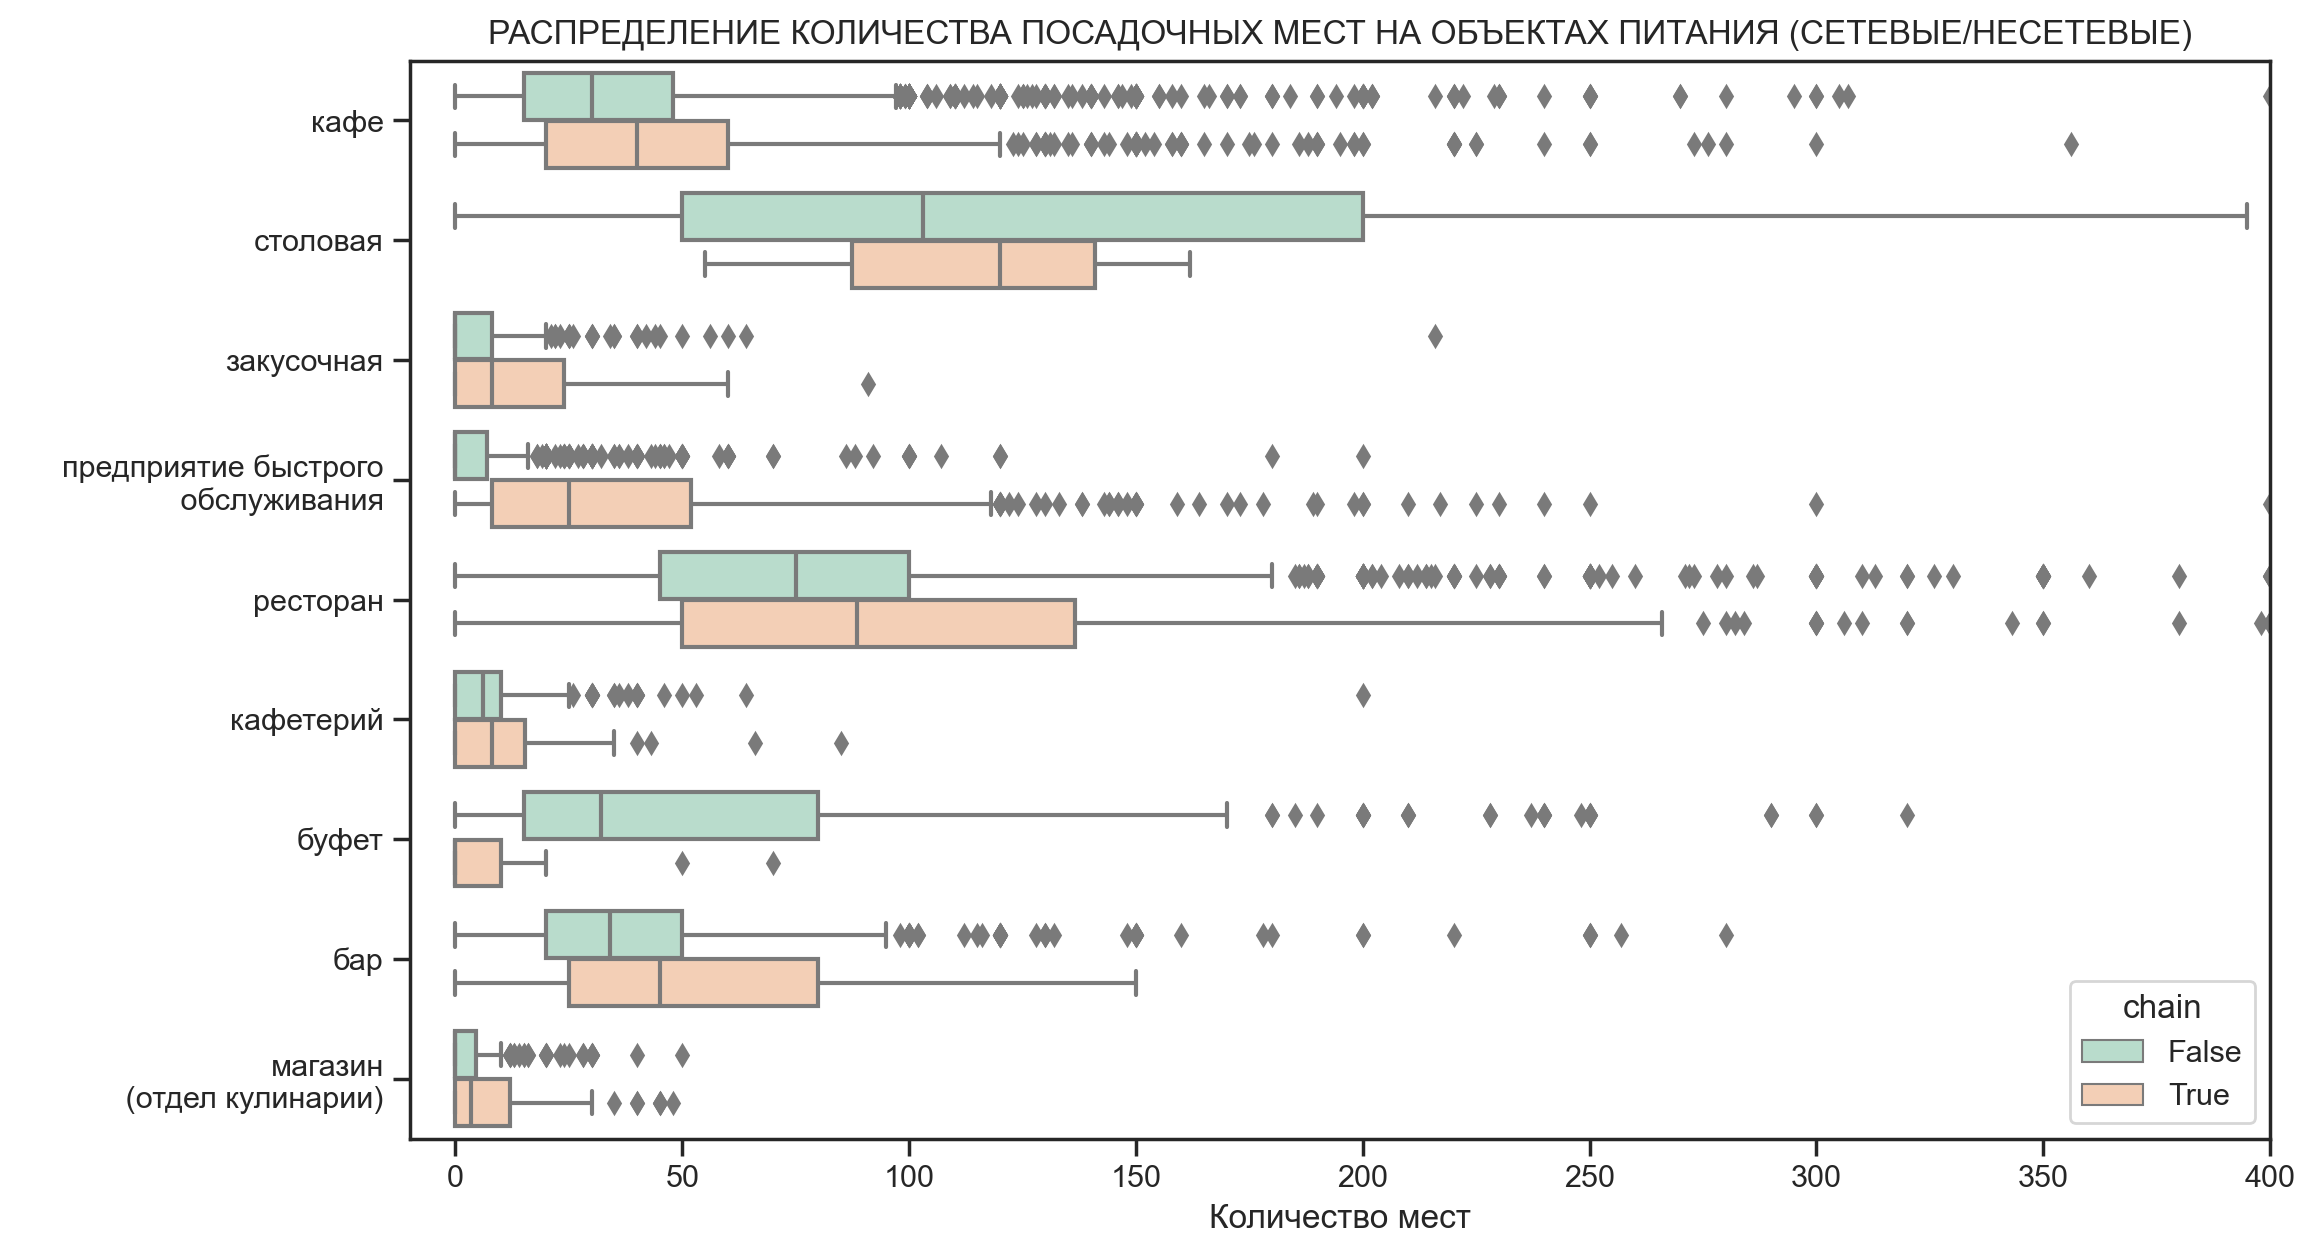

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='number', y='object_type', data=data, hue='chain', palette='Pastel2')
plt.xlim(-10,400)
plt.title('РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА ПОСАДОЧНЫХ МЕСТ НА ОБЪЕКТАХ ПИТАНИЯ (СЕТЕВЫЕ/НЕСЕТЕВЫЕ)')
plt.xlabel('Количество мест')
plt.ylabel(' ') 

plt.show()

Как мы видим, в среднем, значение посадочных мест в сетевых заведениях выше, чем в несетевых для всех типов объектов общественного питания. Но есть два ярких исключения: столовые и буфеты. Это можно объяснить тем, что несетевые заведения открываются под определенную категорию посетителей и под конкретные задачи.

Теперь давайте убедимся, есть ли зависимость среднего количества посадочных мест от количество заведений в сети.

In [24]:
data[data['chain']].groupby(['object_name']).agg(count=('id', 'count'), number_mean=('number','mean'))

,count,number_mean
object_name,,
BEVERLY HILLS DINER,1,88.00
BIERLOGA,1,75.00
BLACK & WHITE,1,40.00
BOCCONCINO,3,66.67
BOOBO,1,46.00
...,...,...
ЯКИТОРИЯ И ЯН ПРИМУС,1,282.00
ЯММИ МИКС,1,2.00
ЯН ПРИМУС,1,300.00


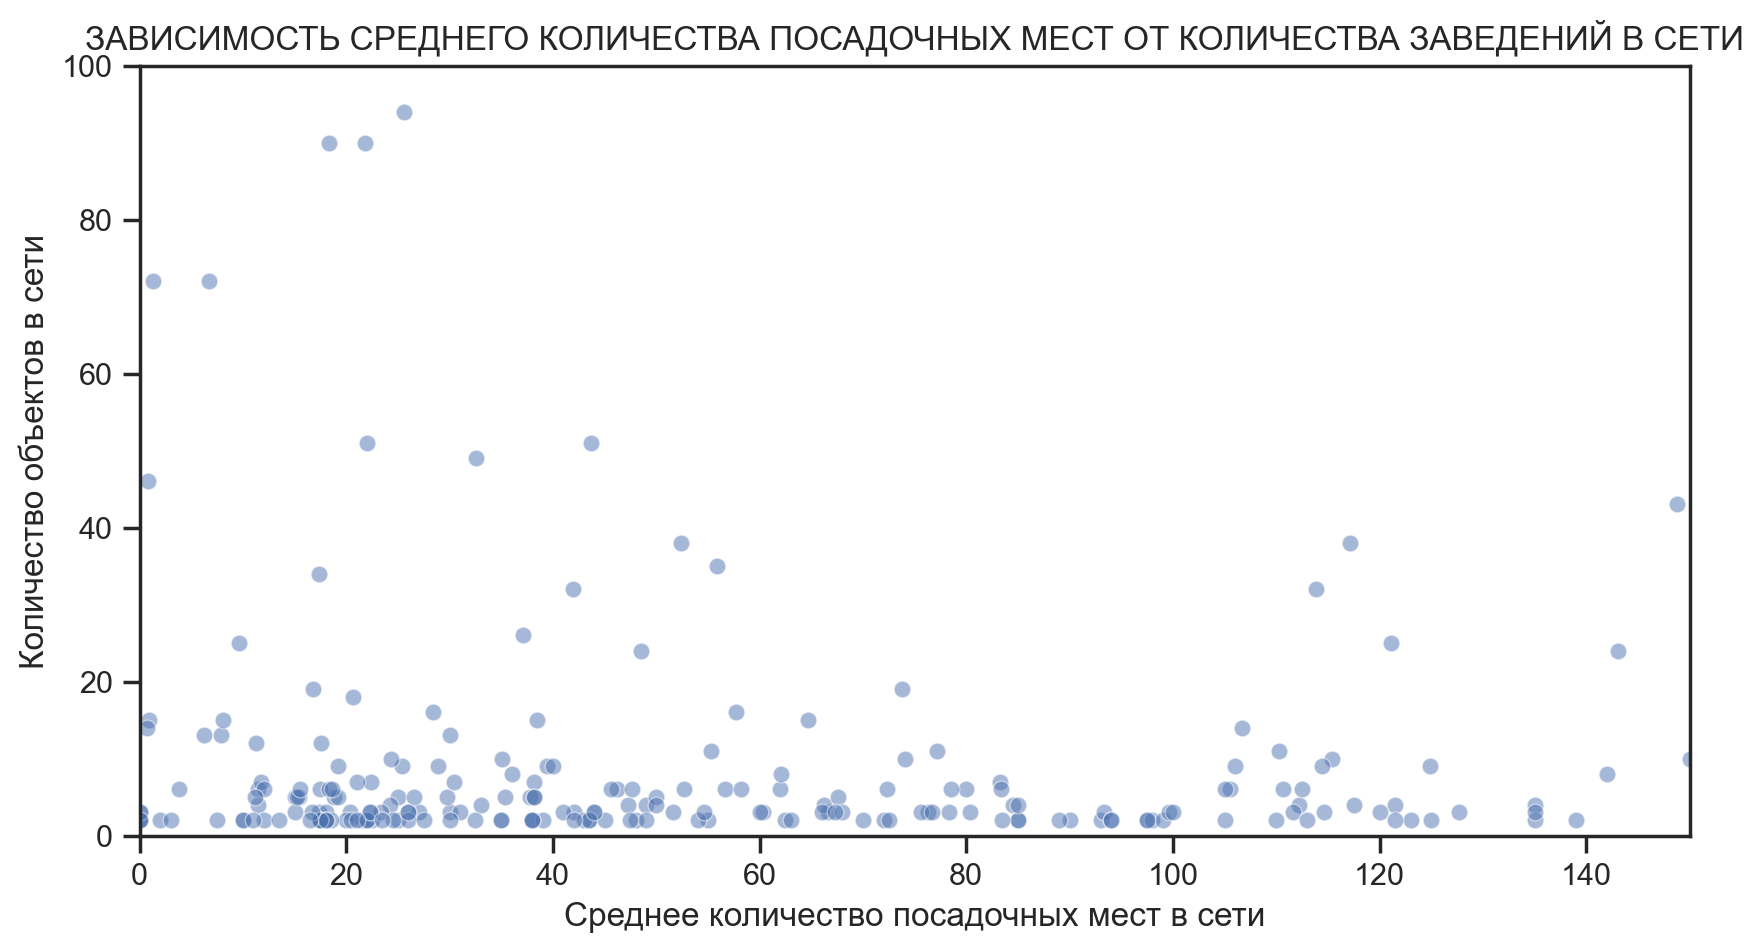

In [25]:
data_chain = data[data['chain']].groupby(['object_name']).agg(count=('id', 'count'), number_mean=('number','mean'))

plt.figure(figsize=(10, 5))
plt.ylim(0, 100) 
plt.xlim(0, 150)# Можно посмотреть поближе в левый нижний угол
plt.title('ЗАВИСИМОСТЬ СРЕДНЕГО КОЛИЧЕСТВА ПОСАДОЧНЫХ МЕСТ ОТ КОЛИЧЕСТВА ЗАВЕДЕНИЙ В СЕТИ')
sns.scatterplot(x = 'number_mean', 
                y = 'count',
                alpha = 0.5,
                data = data_chain[data_chain['count'] >= 2])
plt.xlabel('Среднее количество посадочных мест в сети')
plt.ylabel('Количество объектов в сети')
plt.show()

Выраженной корреляции нет. Но основное количество точек-заведений сконцентрировано в нижнем левом углу - небольшое количество объектов со средним количеством посадочных мест.     
Крупные сети, во-первых, редко встречаются, и во-вторых, редко имеют более 50-ти посадочных мест

Для того, чтобы проверить наше предположение, проведем категоризацию сетей по такому принципу:

* до 120 посадочных мест и до 5 точек в сети - сеть с небольшим числом посадочных мест и большим числом заведений в сети;   
* свыше 120 мест и от 6 и более заведений - сеть с большим числом посадочных мест и большим числом заведений в сети.

Посмотрим, что у нас получилось:

In [26]:
data_chain = data_chain[data_chain['count'] >= 2].reset_index()

def alert_group_importance(row):
    
    chain_cnt = row['count']
    tables_cnt = row['number_mean']

    if chain_cnt <= 5:
        if tables_cnt <= 120:
            return 'сеть с небольшим числом посадочных мест и небольшим числом заведений в сети'
    if chain_cnt > 5:
        if tables_cnt <= 120:
            return 'сеть с небольшим числом посадочных мест и большим числом заведений в сети'
    if chain_cnt > 5:
        if tables_cnt > 120:
            return 'сеть с большим числом посадочных мест и большим числом заведений в сети'
    return 'сеть с большим числом посадочных мест и небольшим числом заведений в сети'

data_chain['status'] = data_chain.apply(alert_group_importance, axis=1) 

data_chain['status'].value_counts()

сеть с небольшим числом посадочных мест и небольшим числом заведений в сети    134
сеть с небольшим числом посадочных мест и большим числом заведений в сети       82
сеть с большим числом посадочных мест и небольшим числом заведений в сети       20
сеть с большим числом посадочных мест и большим числом заведений в сети          9
Name: status, dtype: int64

Вывод: популярны сети локального значения с небольшим (до 120) количеством посадочных мест. 

### Анализ локаций с наибольшим  и наименьшим количеством заведений


Давайте теперь проанализируем данные о локациях: на каких улицах расположено максимальное количество заведений, а на каких есть только одна точка питания.    


Начнем с улиц, на которых расположено максимальное количество заведений. Для построения графика топ-10 улиц по количеству объектов общественного питания, сгруппируем данные.

,street,count
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,170
3,Пресненская набережная,167
4,Варшавское шоссе,155
5,Ленинский проспект,147
6,проспект Вернадского,131
7,Кутузовский проспект,114
8,Каширское шоссе,103
9,Кировоградская улица,102


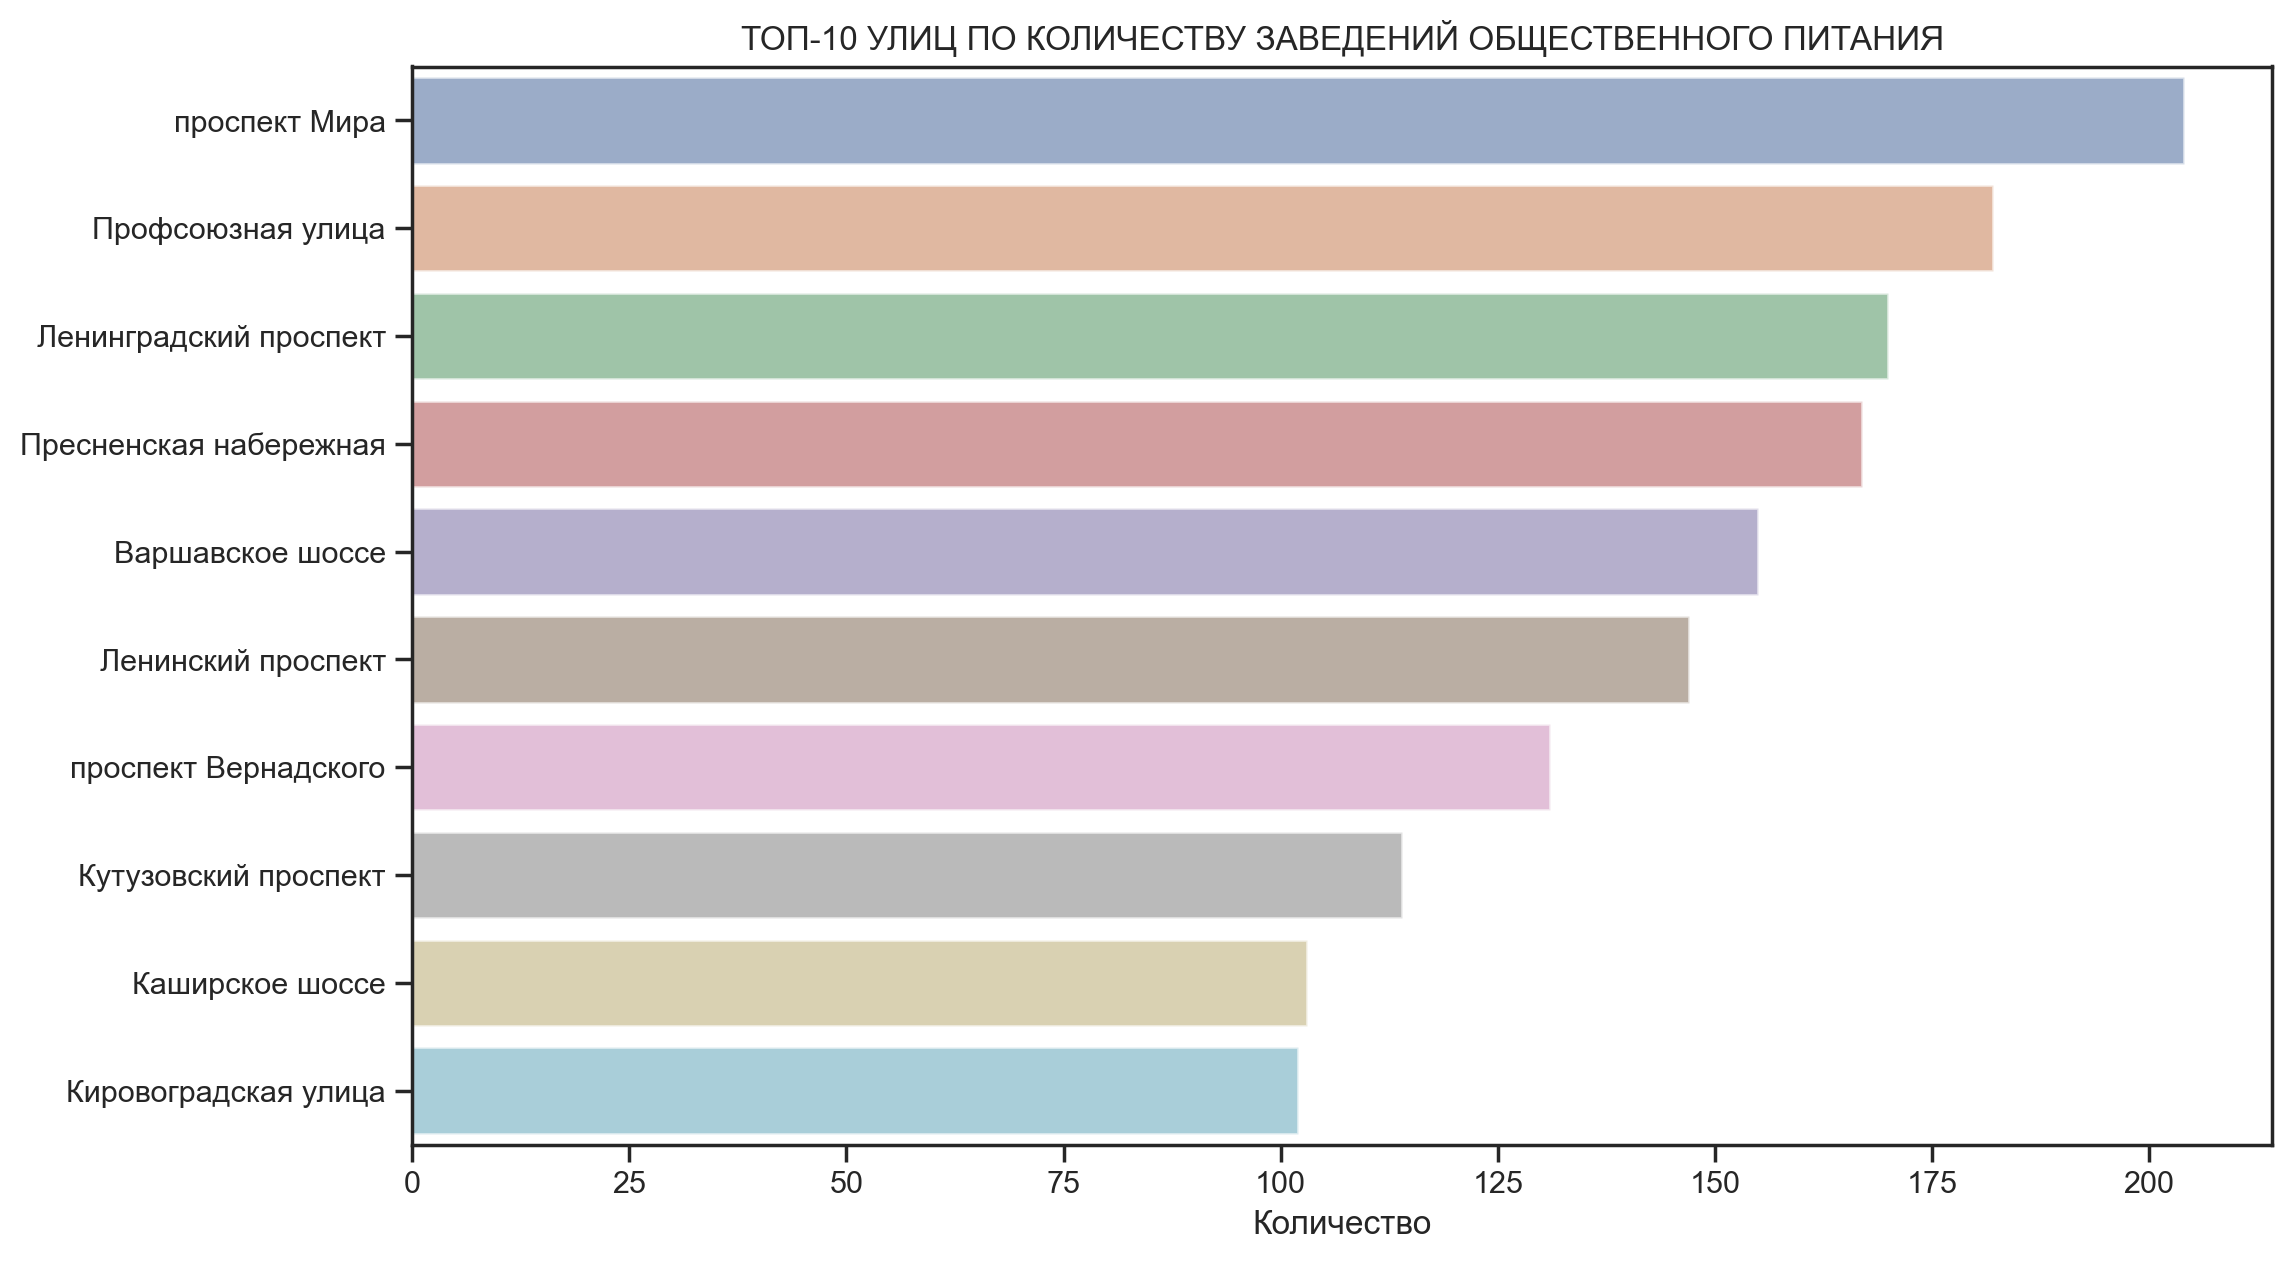

In [27]:
data_by_street = data.groupby('street').agg(count=('id','count')).sort_values('count', ascending=False).reset_index()
data_by_street_top10 = data_by_street.head(10)
display(data_by_street_top10)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='count', y='street', data=data_by_street_top10, alpha=0.6, orient='h')
ax.set_title('ТОП-10 УЛИЦ ПО КОЛИЧЕСТВУ ЗАВЕДЕНИЙ ОБЩЕСТВЕННОГО ПИТАНИЯ')
ax.set_xlabel('Количество') 
ax.set_ylabel('') 
plt.show()

Для того, чтобы ответить на вопрос, в каких районах Москвы находятся эти улицы, обратимся в внешнему открытому источнику (например, справочник улиц Москвы с сайта МосГаза). 

In [28]:
# чтение файлов с данными и сохранение в df
try:
    temp = pd.read_csv('https://hubofdata.ru/dataset/4fee7193-2ead-4a49-ac2d-63928ba7a0f9/resource/9044e34d-2904-48e4-841a-a97b41a9f200/download/mosgaz-streets.csv')
except:
    temp = pd.read_csv('mosgaz-streets.csv')

In [29]:
temp.head(5)

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [30]:
# обогащаем наши таблицы информацией об округе и районе
data_by_street = data_by_street.merge(temp, how='left', left_on='street', right_on='streetname')
data_by_street = data_by_street.drop(['streetname', 'areaid'], axis=1)

data_by_street_top10 = data_by_street_top10.merge(temp, how='left', left_on='street', right_on='streetname')
data_by_street_top10 = data_by_street_top10.drop(['streetname', 'areaid'], axis=1)

Смотрим, в каких районах Москвы находятся улицы из списка топ-10.

In [31]:
data_by_street_top10.groupby('street')['area'].count().reset_index()  # NEW!!!

,street,area
0,Варшавское шоссе,8
1,Каширское шоссе,4
2,Кировоградская улица,3
3,Кутузовский проспект,2
4,Ленинградский проспект,4
5,Ленинский проспект,8
6,Пресненская набережная,1
7,Профсоюзная улица,6
8,проспект Вернадского,5
9,проспект Мира,7


Они же - по округам Москвы.

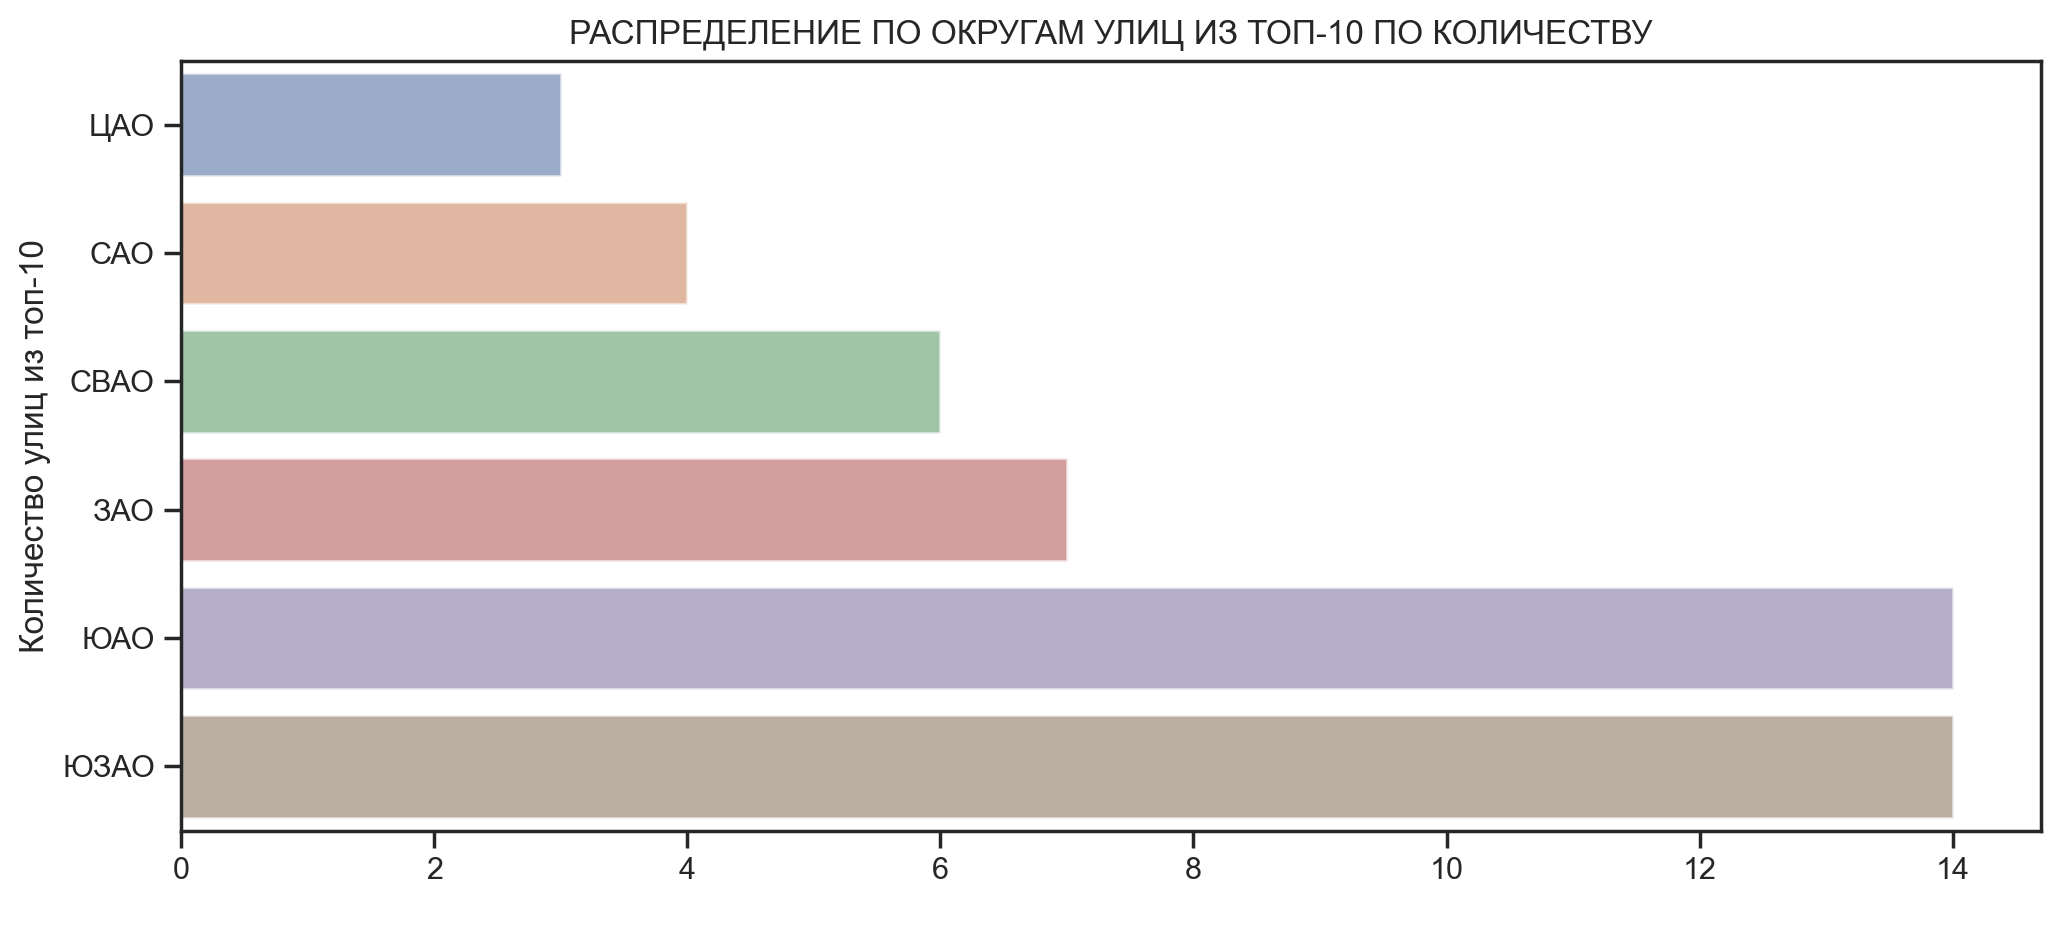

In [32]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(y='okrug', 
                 x='street', 
                 data=data_by_street_top10.groupby('okrug')['street'].count().reset_index().sort_values(by='street'), 
                 alpha=0.6)
ax.set_title('РАСПРЕДЕЛЕНИЕ ПО ОКРУГАМ УЛИЦ ИЗ ТОП-10 ПО КОЛИЧЕСТВУ')
ax.set_xlabel(' ') 
ax.set_ylabel('Количество улиц из топ-10') 
plt.show()

Как мы видим, улицы имеют достаточную продолжительность, так что могут пересекать не только несколько районов, но и несколько округов.

Если говорить о популярных на точки питания округах, то так выглядит список по убыванию: на первом месте ЦАО с огромным отрывом.

In [33]:
data_by_street.groupby('okrug')['count'].count().reset_index().sort_values(by='count', ascending=False)

,okrug,count
6,ЦАО,641
0,ВАО,258
4,СВАО,243
3,САО,238
7,ЮАО,222
8,ЮВАО,189
1,ЗАО,187
9,ЮЗАО,167
5,СЗАО,110
2,Зеленоград,15


Давайте посмотрим, есть закономерности у заведений, расположенных на улицах с большим количеством объектов общественного питания. Возможно, они выделяются количеством посадочных мест?

In [34]:
data[data['street'].isin(data_by_street_top10['street'].unique())]

,id,object_name,chain,object_type,address,number,street
151,155973,КАФЕ «АНДЕРСОН»,True,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,КАФЕ «SUBWAY»,True,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,КАФЕ «ЛАМАДЖО»,False,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,ШАУРМА В ПИТЕ,False,предприятие быстрого\n обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,ВЫПЕЧКА,False,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
...,...,...,...,...,...,...,...
15308,213629,ДОДО ПИЦЦА,True,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненская набережная
15325,198436,МИЛТИ,True,предприятие быстрого\n обслуживания,"город Москва, Ленинградский проспект, дом 80, корпус 17",0,Ленинградский проспект
15347,222491,КАЛЬЯННАЯ «МЯТА LOUNGE»,True,кафе,"город Москва, Профсоюзная улица, дом 142, корпус 1, строение 1",40,Профсоюзная улица
15350,213061,МЯТА,True,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе


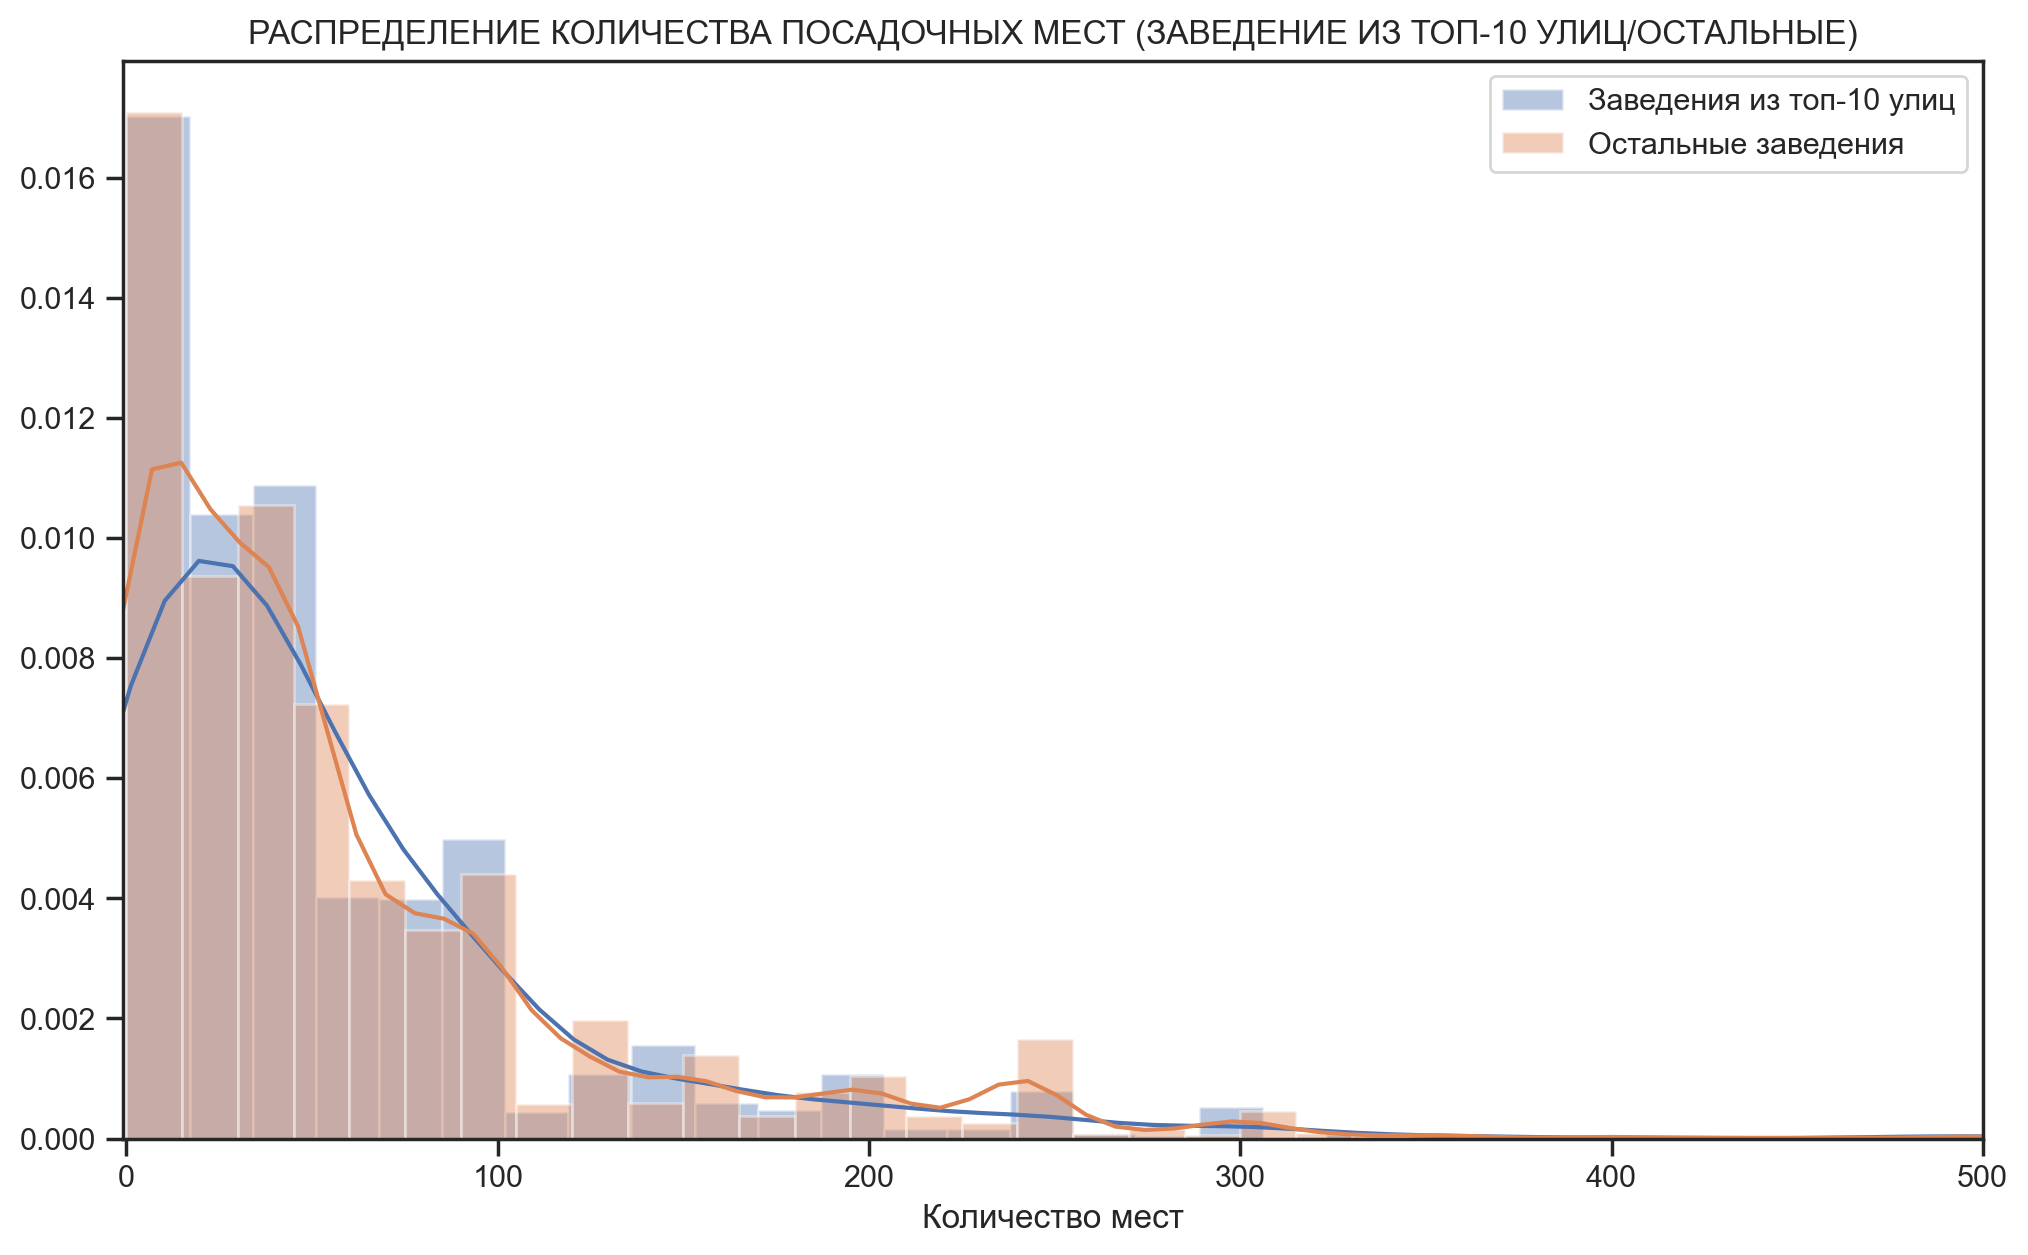

In [35]:
data_by_object_top10 = data[data['street'].isin(data_by_street_top10['street'].unique())]

plt.figure(figsize=(12, 7))
plt.xlim(-1,500)
plt.title('РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА ПОСАДОЧНЫХ МЕСТ (ЗАВЕДЕНИЕ ИЗ ТОП-10 УЛИЦ/ОСТАЛЬНЫЕ)')
sns.distplot(data_by_object_top10.number, bins=100, label='Заведения из топ-10 улиц') 
sns.distplot(data[~data['street'].isin(data_by_street_top10['street'].unique())].number, bins=100, label='Остальные заведения')
plt.xlabel('Количество мест')
plt.ylabel('')
plt.legend()
plt.show()

Закономерностей по количеству посадочных  мест - нет. Их распределение и для заведений с улиц из списка топ-10, и для заведений, расположенных на остальных улицйах - очень и очень похожи.

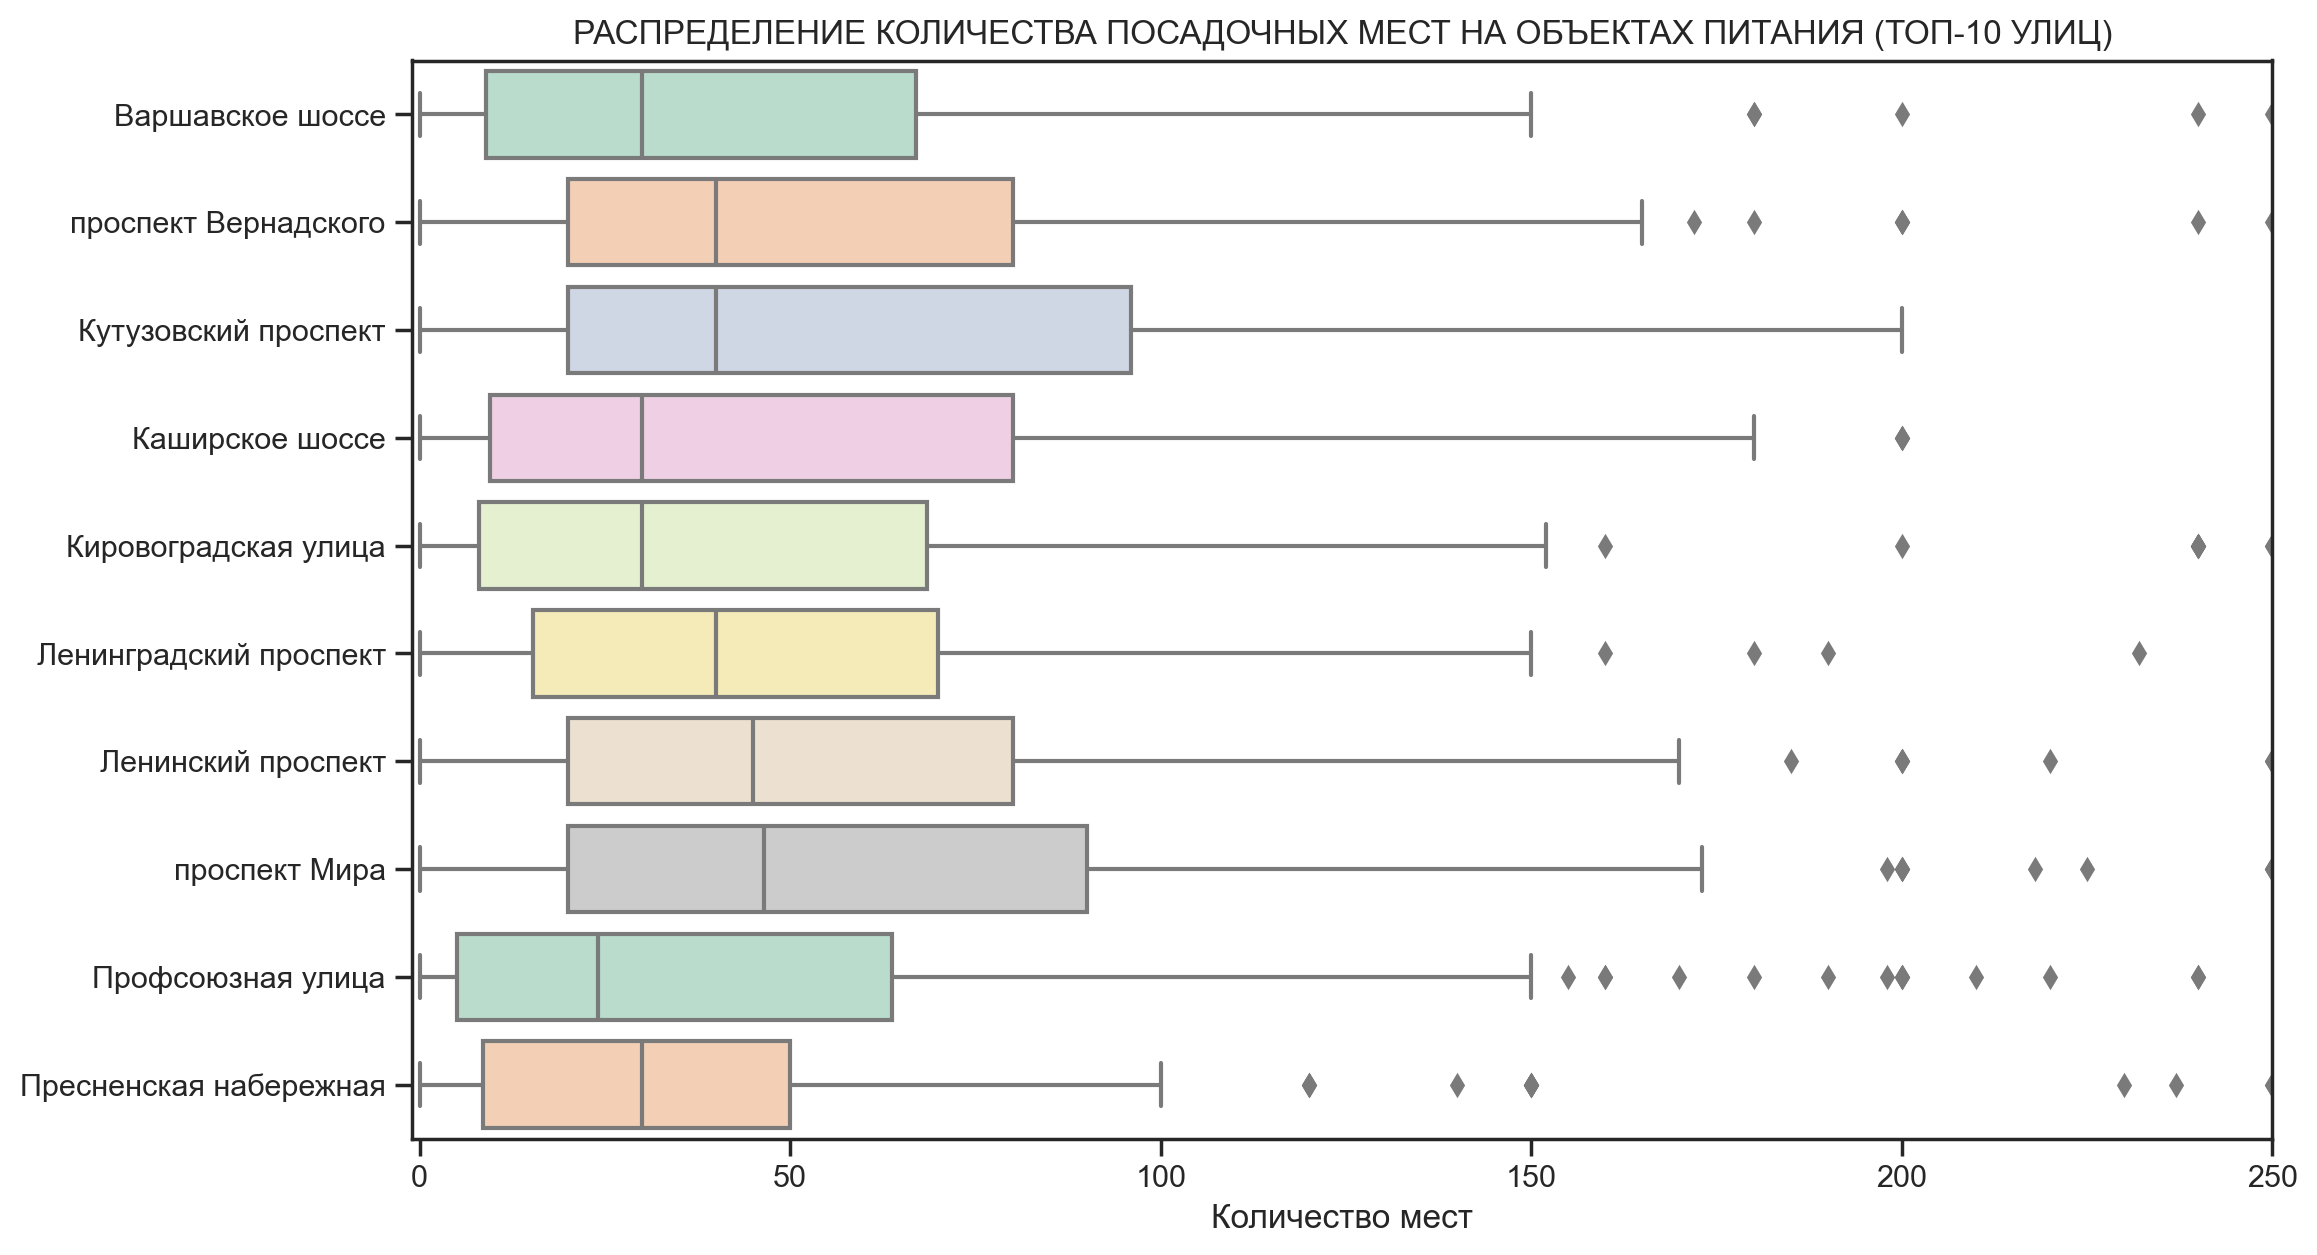

In [36]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='number', y='street', data=data_by_object_top10, palette='Pastel2')
plt.xlim(-1,250)
plt.title('РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА ПОСАДОЧНЫХ МЕСТ НА ОБЪЕКТАХ ПИТАНИЯ (ТОП-10 УЛИЦ)')
plt.xlabel('Количество мест')
plt.ylabel('') 
plt.show()

Большинство заведений предоставляют не более 50 посадочных мест, более 100 мест встречаются крайне редко.
__________     

Теперь применим аналогичный анализ к улицам, на которых есть только одно предприятие общественного питания.

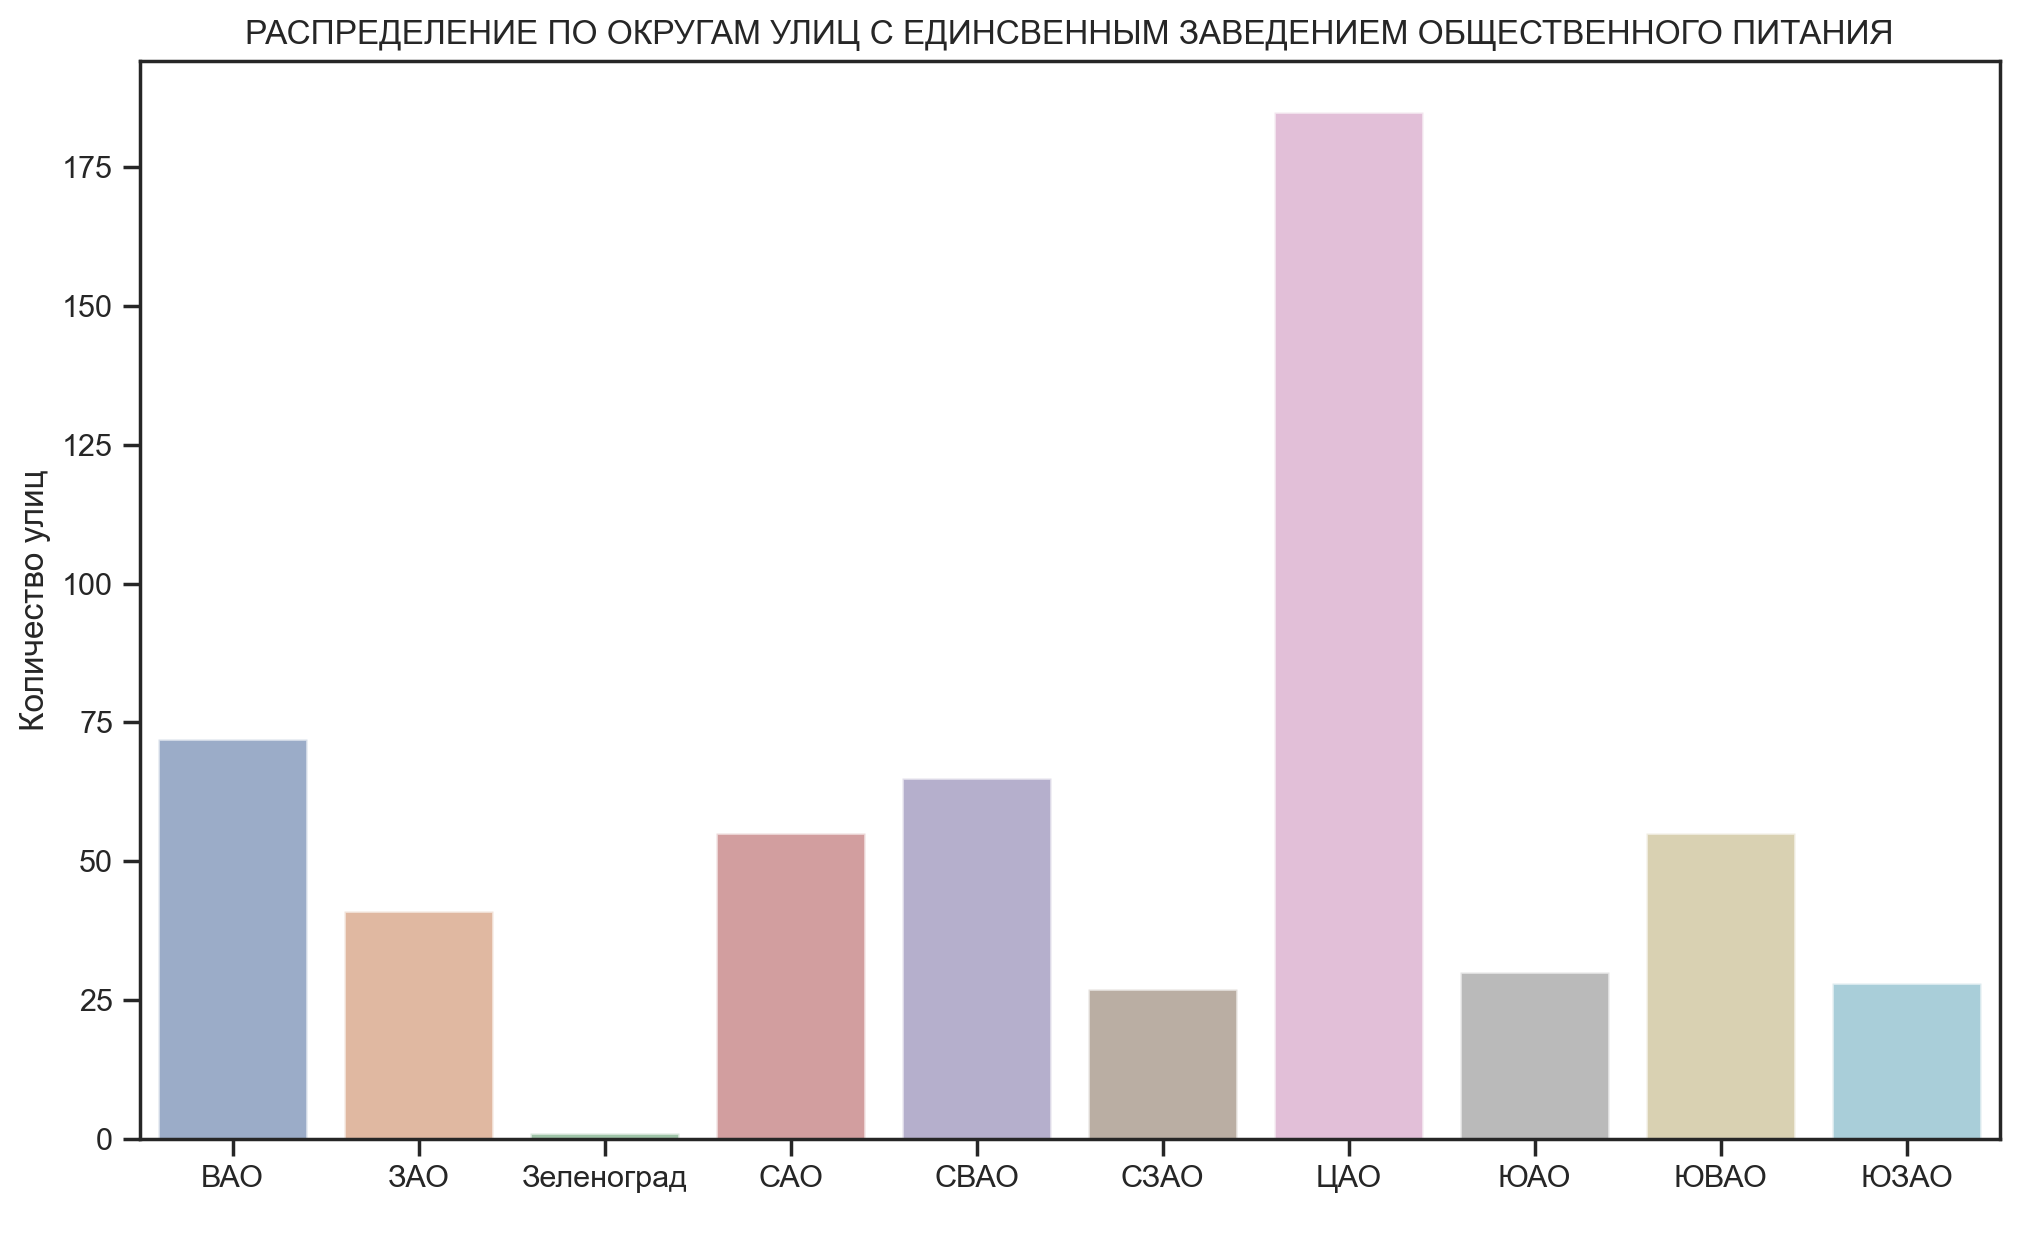

In [37]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='okrug', 
                 y='street', 
                 data=data_by_street.query('count == 1').groupby('okrug')['street'].count().reset_index(), 
                 alpha=0.6)
ax.set_title('РАСПРЕДЕЛЕНИЕ ПО ОКРУГАМ УЛИЦ С ЕДИНСВЕННЫМ ЗАВЕДЕНИЕМ ОБЩЕСТВЕННОГО ПИТАНИЯ')
ax.set_xlabel(' ') 
ax.set_ylabel('Количество улиц') 
plt.show()

Лидирует Центральный административный округ с его маленькими уютными улочками.     

А вот таже информация в разрезе районов Москвы.

In [38]:
(
    data_by_street
    .query('count == 1')
    .groupby('area')['street'].count()
    .reset_index()
    .sort_values('street', ascending=False)
    .head(10)
)            

,area,street
94,Таганский район,27
80,Район Хамовники,26
3,Басманный район,25
95,Тверской район,20
20,Пресненский район,19
50,Район Марьина роща,17
21,Район Арбат,17
13,Мещанский район,16
74,Район Сокольники,15
33,Район Замоскворечье,14


In [39]:
print('Количество улиц с единственным объектом общественного питания:', 
      data_by_street.query('count == 1').groupby('street').count()['count'].sum())

Количество улиц с единственным объектом общественного питания: 890


## Выводы

**Типы объектов общественного питания:**    

* Кафе - самое распространённое заведение общественного питания: около 40% всех точек относятся к данному типу;    
* Далее по численности идут столовые (17%), рестораны (15%) и предприятия быстрого обслуживания (12.5%);     
* Меньше всего в Москве баров (5.6%), буфетов (3.8%), кафетериев (2.6%), закусочных (2.3%) и отделов кулинарии (1.8%).     

**Сетевые заведения:**     

* сетевой явлется только каждая 5-ая точка общественного питания;    
* типичный представитель сетевого заведения - предприятие быстрого обсулживания (41%);     
* достаточно широко представлены отделы кулинарии (29%), рестораны (24%) и кафе (23%);      
* при этом, по абсолютному количеству среди сетей лидируют кафе.     


**Посадочные места:**

* в Москве представлены заведения с широким диапазоном посадочных мест (начиная от их полного отсутствия в закусочных и магазинах и заканчивая огромными банкетными залами на 1700 посадочных мест);        
* если не впадать в крайности, то список посадочных мест по убыванию в заведениях выглядит так: столовые (среднее кол-во мест 112) и рестораны (100), бары (53), кафе (47)и предприятия быстрого обслуживания (40);          
* среднее значение посадочных мест в сетевых заведениях выше, чем в несетевых;
* типичная сеть заведений  - это небольшое (до 20) количество точек с  средним количеством посадочных мест (до 50);    
* крупных сетей мало,  и они практически не имеют более 50-ти посадочных мест.     


**Расположение объектов общественного питания:**

* улицы, имеющие большое количество заведений проходят сразу через несколько районов, а порой и округов Москвы;     
* самое большое количество улиц с единственным заведением находится в ЦАО; врочем, как, большинство заведений так же распологается в ЦАО;
* распределения количества посадочных мест на улицах с наибольшим количеством точек общественного питания и по всей остальной базе практически совпадают, нет никаких характерных закономерностей.

**Рекомендации**

В ходе исследования мы подтвердили, что кафе - это один из самых перспективных вариантов среди заведений общественного питания. Оптимальное количество посадочных мест - до 50. Наибольшее количество существующих заведений сосредоточено в ЦАО.      

С учетом специфики будущего заведения (гостей должны обслуживать роботы)  - основной целевой аудиторией видятся представители молодежи и семьи с детьми: в таком месте получаются отличные селфи, которые не стыдно показать друзьям и знакомым, а дети будут просто в восторге от роботов-официантов. 

Следовательно, в качестве локации рекомендуем обратить внимание на центр Москвы (ЦАО). Центр - это всегда улицы с высокой проходимостью и большое количество праздных людей и туристов. Т.о. можно достаточно долго поддерживать необходимое количество посетителей, не опасаясь, что поток клиентов иссякнет, когда пропадет эффект новизны или когда все зеваки насмотрятся на роботов-официантов.   

В части масштабирования, сеть из 2-4 точек (с учетом специфики будущего заведения) кажется оптимальной, если у владельцев появится такое желание.
